## **Problem Statement**

### Business Context

The prices of the stocks of companies listed under a global exchange are influenced by a variety of factors, with the company's financial performance, innovations and collaborations, and market sentiment being factors that play a significant role. News and media reports can rapidly affect investor perceptions and, consequently, stock prices in the highly competitive financial industry. With the sheer volume of news and opinions from a wide variety of sources, investors and financial analysts often struggle to stay updated and accurately interpret its impact on the market. As a result, investment firms need sophisticated tools to analyze market sentiment and integrate this information into their investment strategies.

### Problem Definition

With an ever-rising number of news articles and opinions, an investment startup aims to leverage artificial intelligence to address the challenge of interpreting stock-related news and its impact on stock prices. They have collected historical daily news for a specific company listed under NASDAQ, along with data on its daily stock price and trade volumes.

As a member of the Data Science and AI team in the startup, you have been tasked with analyzing the data, developing an AI-driven sentiment analysis system that will automatically process and analyze news articles to gauge market sentiment, and summarizing the news at a weekly level to enhance the accuracy of their stock price predictions and optimize investment strategies. This will empower their financial analysts with actionable insights, leading to more informed investment decisions and improved client outcomes.

### Data Dictionary

* `Date` : The date the news was released
* `News` : The content of news articles that could potentially affect the company's stock price
* `Open` : The stock price (in \$) at the beginning of the day
* `High` : The highest stock price (in \$) reached during the day
* `Low` :  The lowest stock price (in \$) reached during the day
* `Close` : The adjusted stock price (in \$) at the end of the day
* `Volume` : The number of shares traded during the day
* `Label` : The sentiment polarity of the news content
    * 1: positive
    * 0: neutral
    * -1: negative

## **Please read the instructions carefully before starting the project.**

**Note**: If the free-tier GPU of Google Colab is not accessible (due to unavailability or exhaustion of daily limit or other reasons), the following steps can be taken:

1. Wait for 12-24 hours until the GPU is accessible again or the daily usage limits are reset.

2. Switch to a different Google account and resume working on the project from there.

3. Try using the CPU runtime:
    - To use the CPU runtime, click on *Runtime* => *Change runtime type* => *CPU* => *Save*
    - One can also click on the *Continue without GPU* option to switch to a CPU runtime (kindly refer to the snapshot below)
    - The instructions for running the code on the CPU are provided in the respective sections of the notebook.

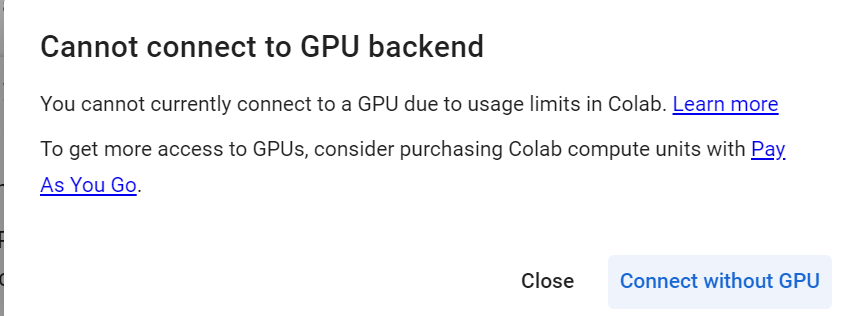

## **Installing and Importing Necessary Libraries**

In [1]:
# installing the sentence-transformers and gensim libraries for word embeddings
!pip install -U sentence-transformers gensim transformers tqdm -q

In [2]:
# To manipulate and analyze data
import pandas as pd
import numpy as np

# To visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# To used time-related functions
import time

# to use regular expressions for manipulating text data
import re

# to load the natural language toolkit
import nltk
nltk.download('stopwords')    # loading the stopwords
nltk.download('wordnet')    # loading the wordnet module that is used in stemming

# to remove common stop words
from nltk.corpus import stopwords

# to perform stemming
from nltk.stem.porter import PorterStemmer

# to create Bag of Words
from sklearn.feature_extraction.text import CountVectorizer

# to split data into train and test sets
from sklearn.model_selection import train_test_split

# to build a Random Forest model
from sklearn.ensemble import RandomForestClassifier

# to compute metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

# To tune different models
from sklearn.model_selection import GridSearchCV

# To parse JSON data
import json

# to load transformer models
from sentence_transformers import SentenceTransformer
from transformers import T5Tokenizer, T5ForConditionalGeneration, pipeline

# To build, tune, and evaluate ML models
# from sklearn.ensemble import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# To load/create word embeddings
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

# To work with transformer models
import torch
from sentence_transformers import SentenceTransformer

# To undersample and oversample the data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To implement progress bar related functionalities
from tqdm import tqdm
tqdm.pandas()

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vijay\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vijay\AppData\Roaming\nltk_data...


## **Loading the dataset**

In [268]:
# uncomment and run the following code if Google Colab is being used and the dataset is in Google Drive
#from google.colab import drive
#drive.mount('/content/drive')

In [267]:
#stock_news = pd.read_csv("/content/drive/MyDrive/AIML/NLPProject/stock_news.csv")

In [4]:
stock_news = pd.read_csv("C:/Users/vijay/Desktop/PGP-AIML/NLP Project/stock_news.csv")

In [5]:
#Creating a copy of the dataset
stock = stock_news.copy()

## **Data Overview**

In [6]:
print(stock.shape)

(349, 8)


*Dataset is having 349 rows and 8 columns*

In [7]:
stock.head()

,Date,News,Open,High,Low,Close,Volume,Label
0,2019-01-02,The tech sector experienced a significant dec...,41.740002,42.244999,41.482498,40.246914,130672400,-1
1,2019-01-02,Apple lowered its fiscal Q1 revenue guidance ...,41.740002,42.244999,41.482498,40.246914,130672400,-1
2,2019-01-02,Apple cut its fiscal first quarter revenue fo...,41.740002,42.244999,41.482498,40.246914,130672400,-1
3,2019-01-02,This news article reports that yields on long...,41.740002,42.244999,41.482498,40.246914,130672400,-1
4,2019-01-02,Apple's revenue warning led to a decline in U...,41.740002,42.244999,41.482498,40.246914,130672400,-1


In [8]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    349 non-null    object 
 1   News    349 non-null    object 
 2   Open    349 non-null    float64
 3   High    349 non-null    float64
 4   Low     349 non-null    float64
 5   Close   349 non-null    float64
 6   Volume  349 non-null    int64  
 7   Label   349 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 21.9+ KB


**Observations**

*   Out of 7 columns - 2 columns are related to object
*   Data column should be coverted to Date format





In [9]:
stock.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,349.0,4.622923e+01,6.442817e+00,3.756750e+01,4.174000e+01,4.597500e+01,5.070750e+01,6.681750e+01
High,349.0,4.670046e+01,6.507321e+00,3.781750e+01,4.224500e+01,4.602500e+01,5.085000e+01,6.706250e+01
Low,349.0,4.574539e+01,6.391976e+00,3.730500e+01,4.148250e+01,4.564000e+01,4.977750e+01,6.586250e+01
Close,349.0,4.492632e+01,6.398338e+00,3.625413e+01,4.024691e+01,4.459692e+01,4.911079e+01,6.480523e+01
Volume,349.0,1.289482e+08,4.317031e+07,4.544800e+07,1.032720e+08,1.156272e+08,1.511252e+08,2.444392e+08
Label,349.0,-5.444126e-02,7.151192e-01,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [10]:
stock['Date'] = pd.to_datetime(stock['Date'])  # to convert the 'Date' column in the 'stock' DataFrame to datetime format.

In [11]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    349 non-null    datetime64[ns]
 1   News    349 non-null    object        
 2   Open    349 non-null    float64       
 3   High    349 non-null    float64       
 4   Low     349 non-null    float64       
 5   Close   349 non-null    float64       
 6   Volume  349 non-null    int64         
 7   Label   349 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 21.9+ KB


## Checking Missing value

In [12]:
stock.isnull().sum()

Date      0
News      0
Open      0
High      0
Low       0
Close     0
Volume    0
Label     0
dtype: int64

**Observation**
- We don't have any missing values

## Checking Duplicate Values

In [13]:
# checking for duplicate values
stock.duplicated().sum()

0

**Observation**:
- No dublicate values in the dataset

## **Exploratory Data Analysis**

### Univariate Analysis

* Distribution of individual variables
* Compute and check the distribution of the length of news content

**Utility Functions**

In [14]:
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [15]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [16]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    color = ['blue', 'red', 'purple', 'black']
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5),color=color)
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

**Observations**
- Slightly left screwed distribution
- Maximum stock are opned between > ~38 to < ~52; we have limited stock more than ~55

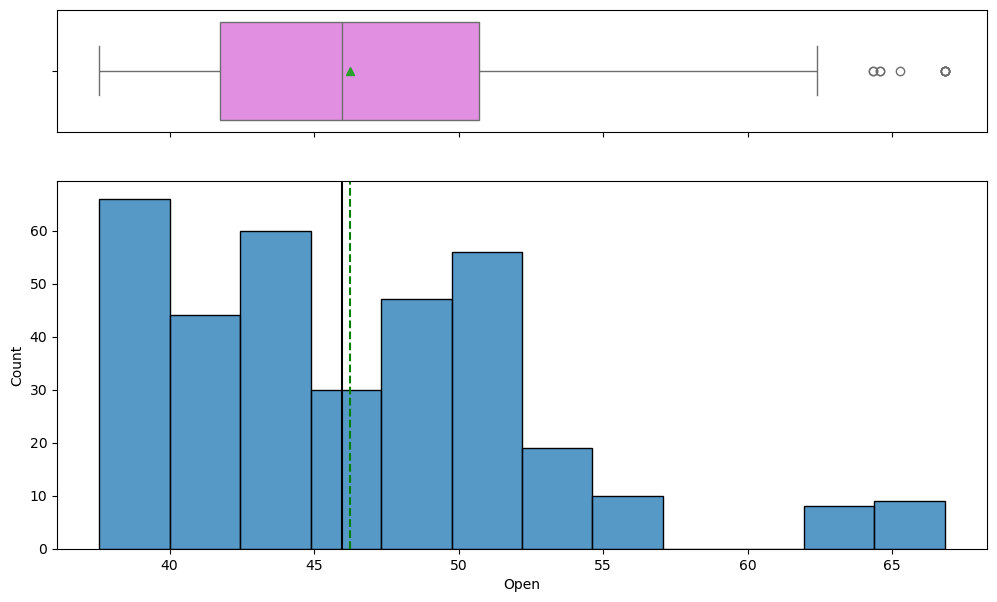

In [17]:
histogram_boxplot(stock, "Open")

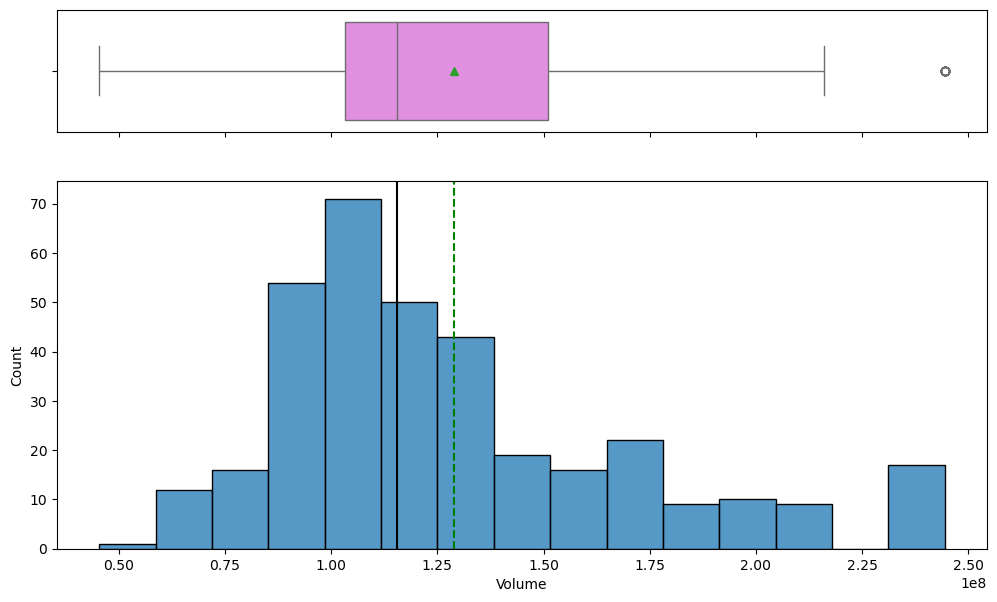

In [18]:
histogram_boxplot(stock, "Volume")

**Observations**
- Slighty left screwed distibution & we have some outliers in the data

In [19]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

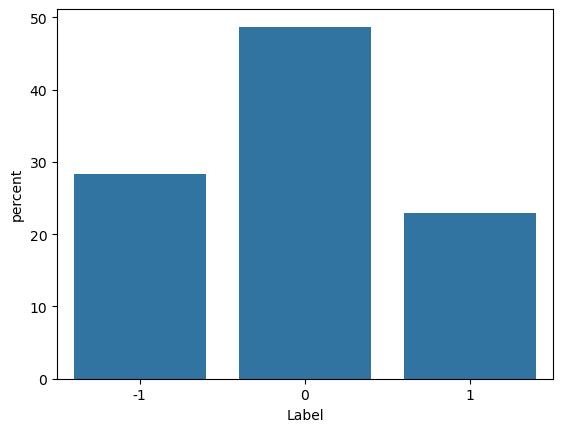

In [20]:
#|: "Distribution of the target variable by species name"
sns.countplot(data=stock, x="Label", stat="percent");
plt.show();

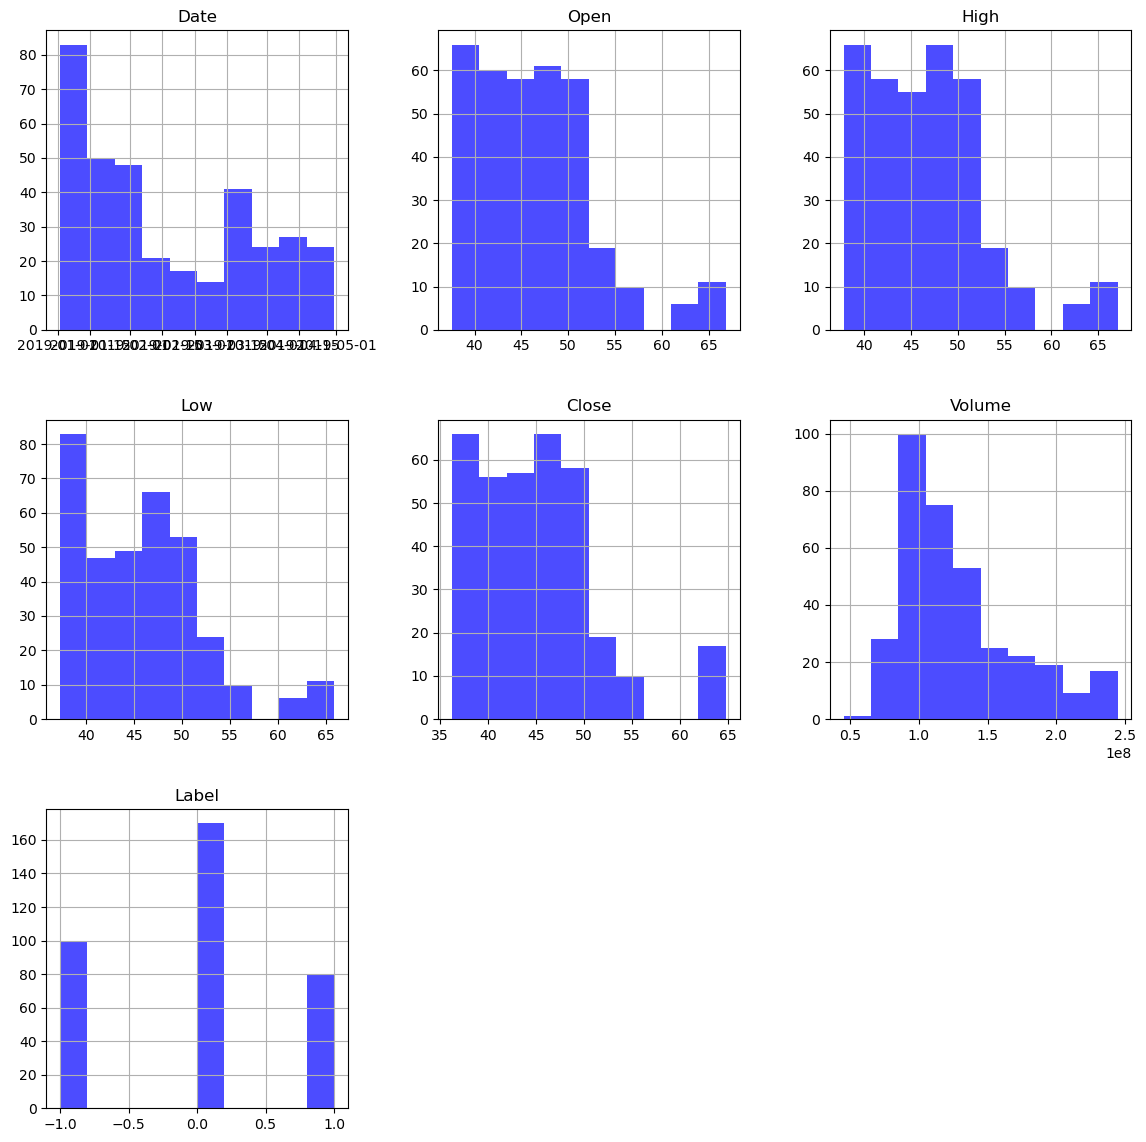

In [21]:
# creating histograms for whole dataframe
stock.hist(figsize=(14, 14), color ='blue', alpha = 0.7)
plt.show()

**Observation**
- Positive and Negative are near equal amount of data
- Netrual data is double of Postive / Negative data

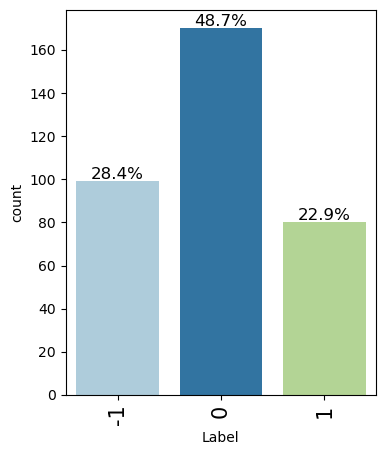

In [22]:
labeled_barplot(stock,"Label",perc=True)

**Observation**
- Netural % is near equal to addition of Postive and Negative %

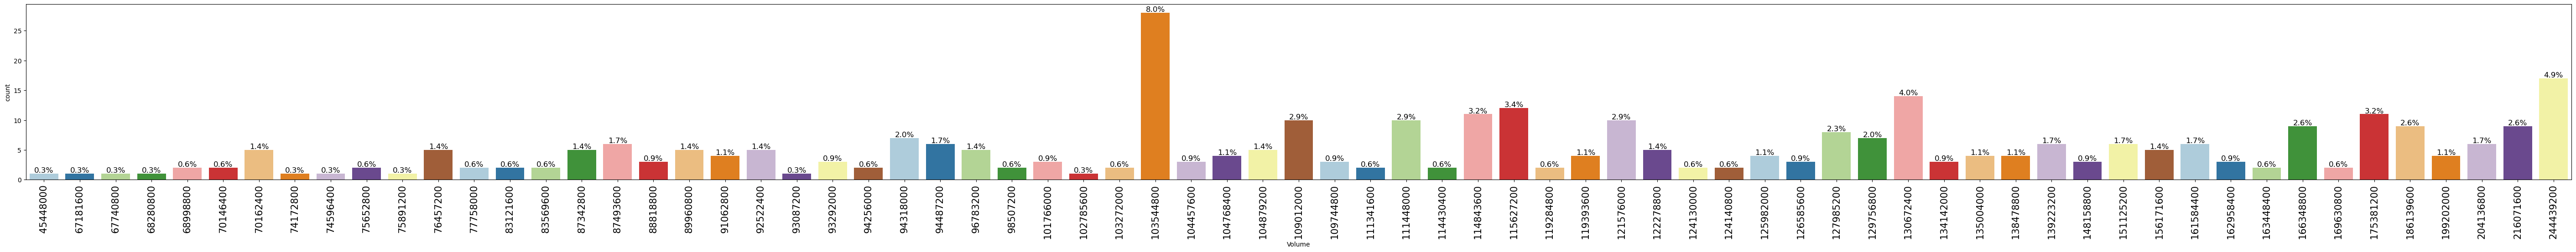

In [23]:
labeled_barplot(stock,"Volume",perc=True)

<Figure size 1500x1500 with 0 Axes>

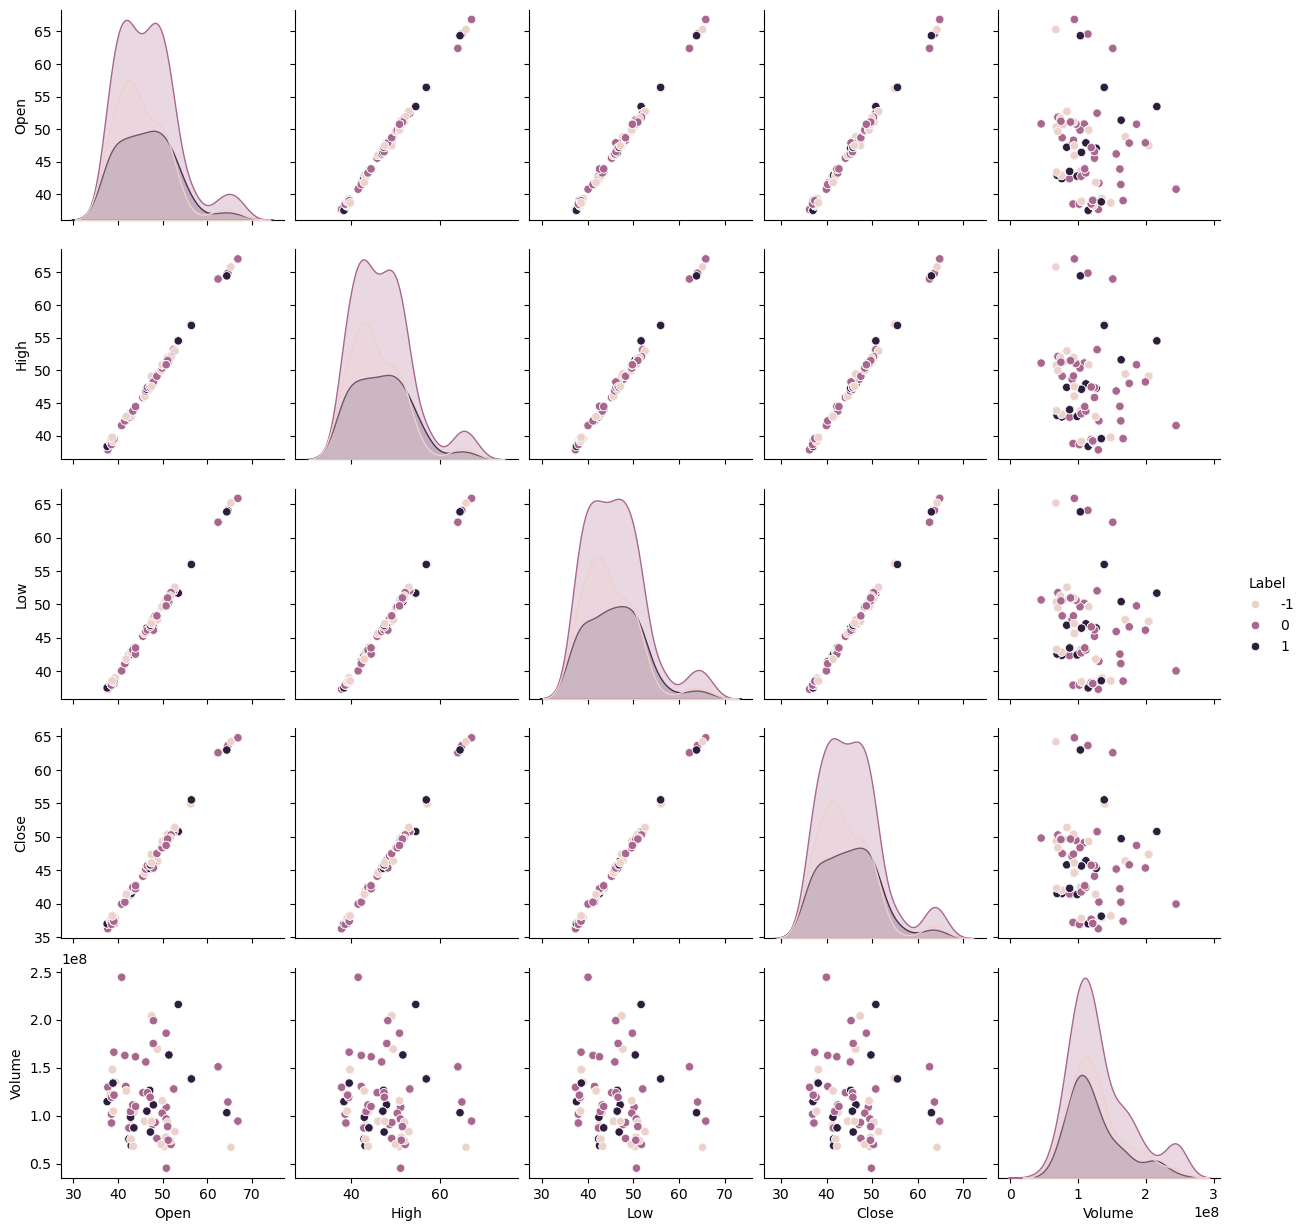

In [24]:
plt.figure(figsize=(15,15))
sns.pairplot(stock, hue="Label");
plt.show()

### Bivariate Analysis

* Correlation
* Sentiment Polarity vs Price
* Date vs Price

**Note**: The above points are listed to provide guidance on how to approach bivariate analysis. Analysis has to be done beyond the above listed points to get maximum scores.

In [25]:
#Calculating the total number of words present in the news content.
stock['news_len'] = stock['News'].apply(lambda x: len(x.split(' ')))
print (stock['news_len'].describe())
print(stock['news_len'].info())


count    349.000000
mean      49.312321
std        5.727770
min       19.000000
25%       46.000000
50%       50.000000
75%       53.000000
max       61.000000
Name: news_len, dtype: float64
<class 'pandas.core.series.Series'>
RangeIndex: 349 entries, 0 to 348
Series name: news_len
Non-Null Count  Dtype
--------------  -----
349 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB
None


**Observation**
- News length is between 19 to 61
- Most of the news are in between 46 (25%) to 53 (75%)

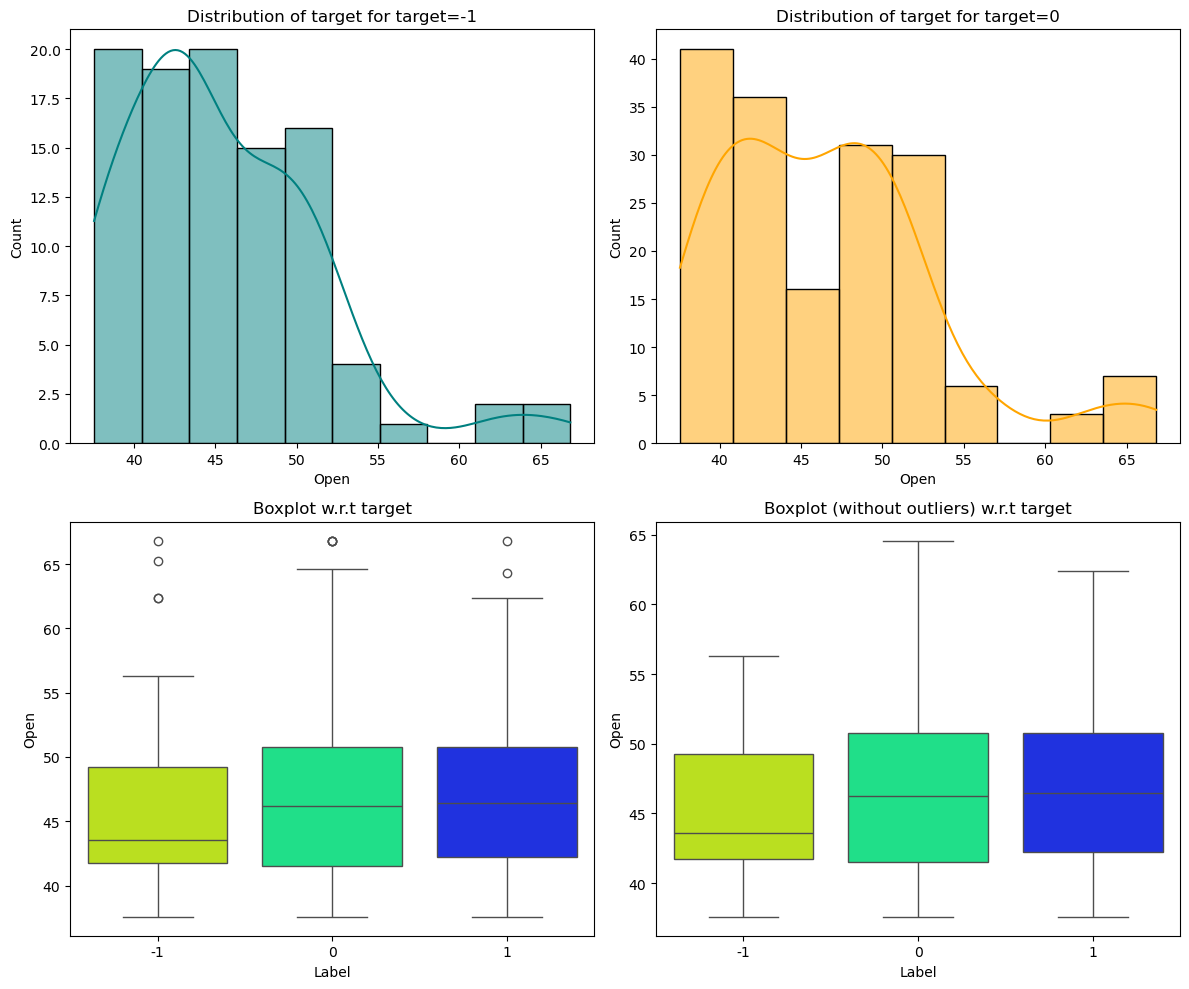

In [26]:
distribution_plot_wrt_target(stock, "Open", "Label")

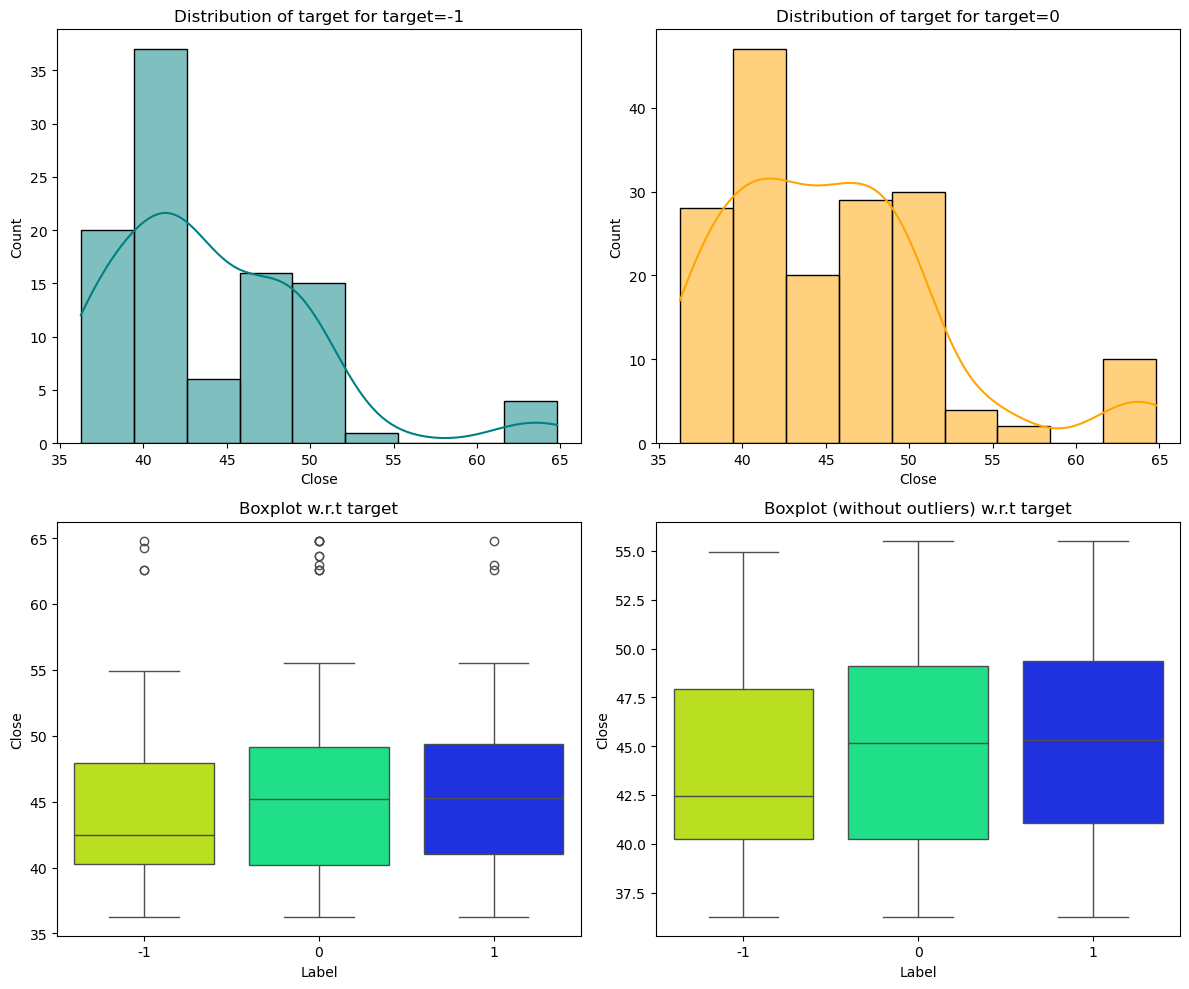

In [27]:
distribution_plot_wrt_target(stock, "Close", "Label")

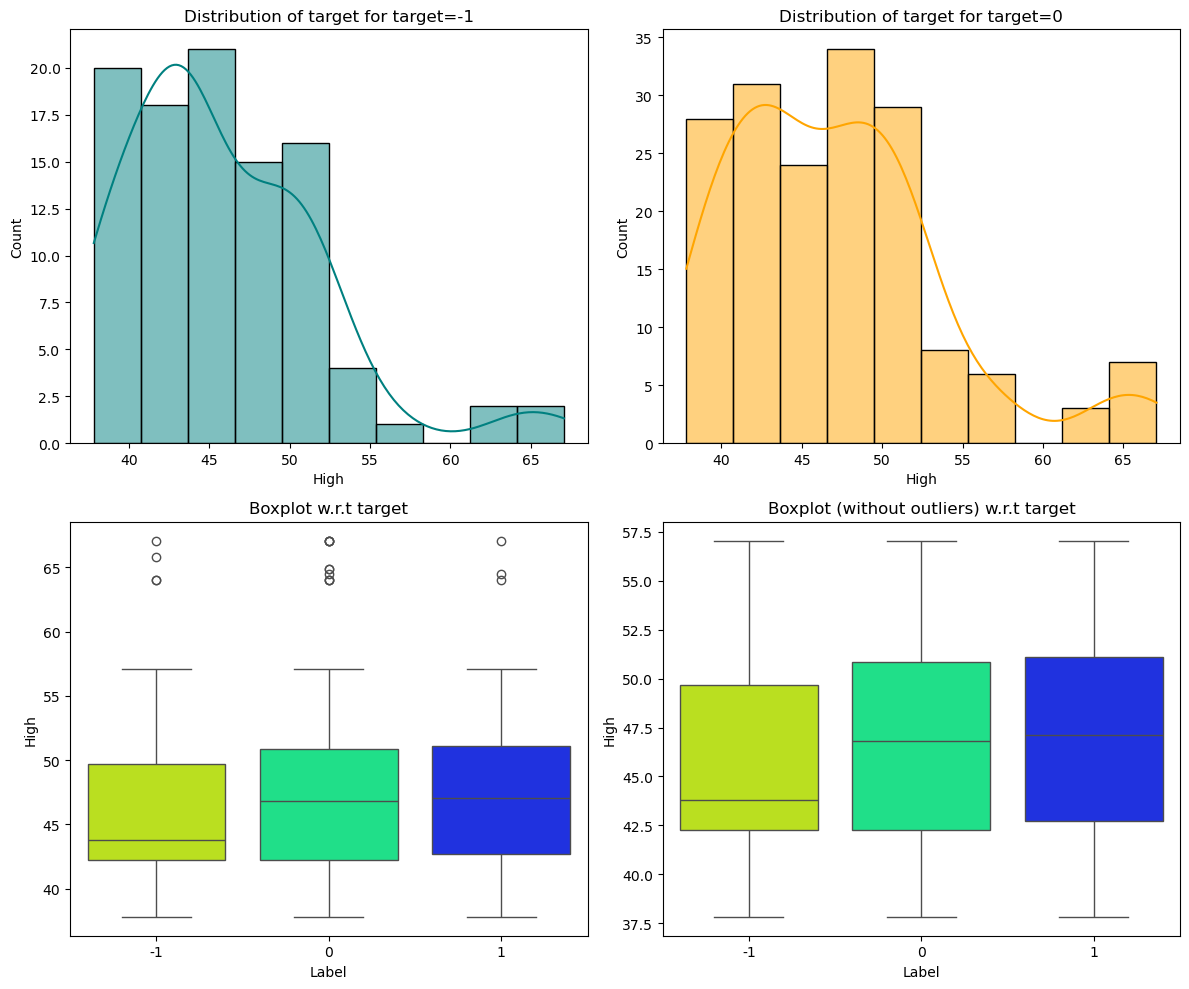

In [28]:
distribution_plot_wrt_target(stock, "High", "Label")

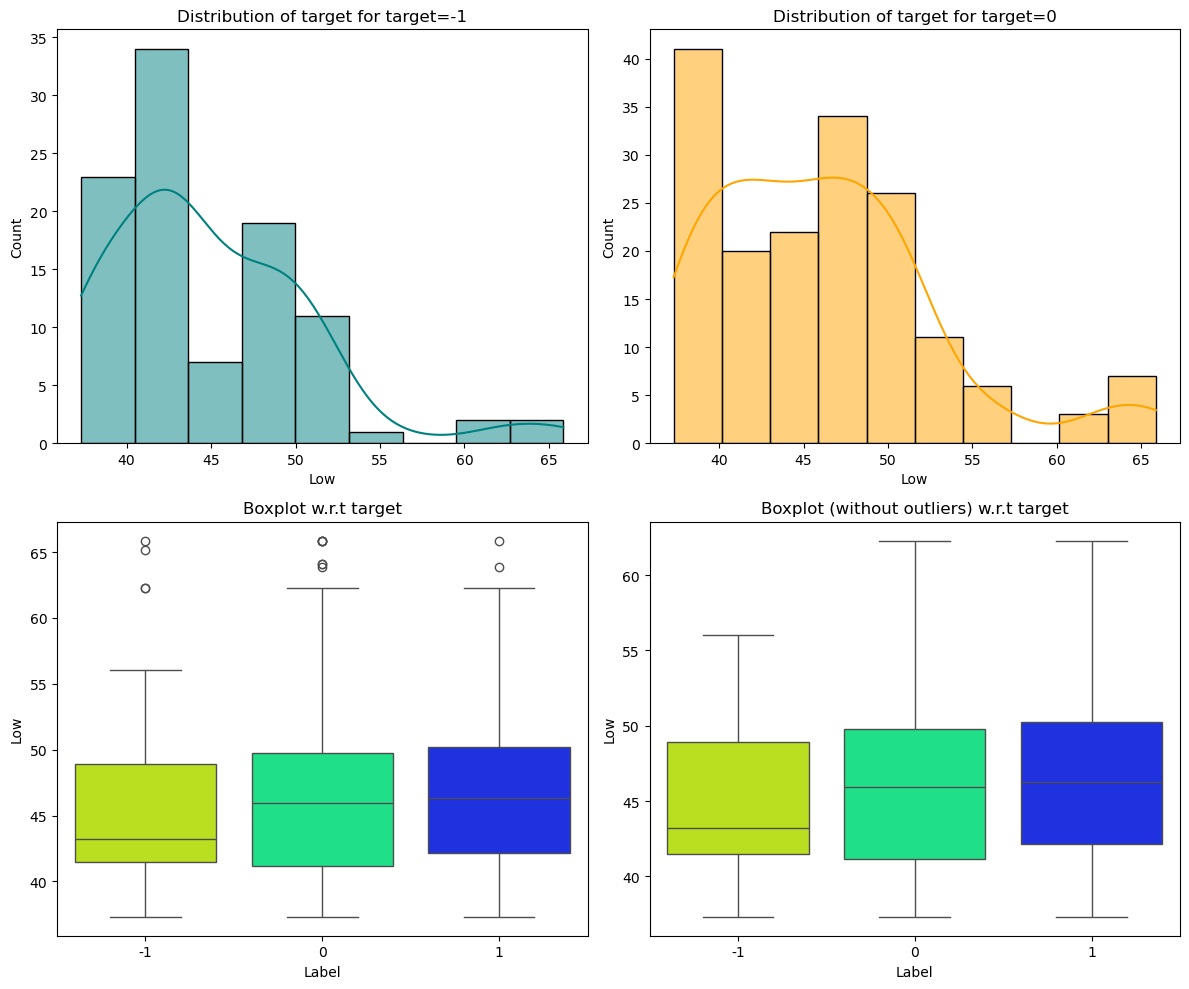

In [29]:
distribution_plot_wrt_target(stock, "Low", "Label")

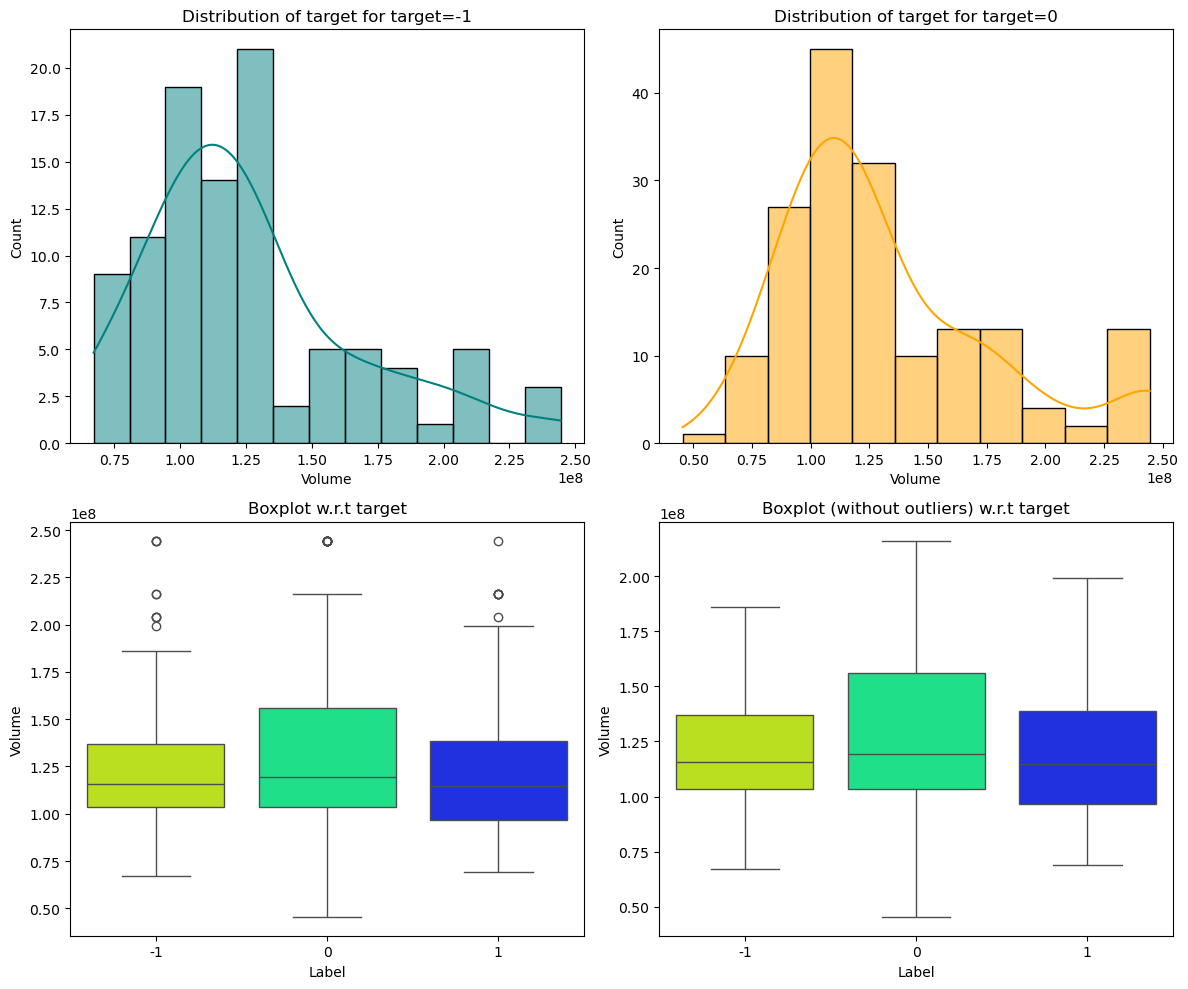

In [30]:
distribution_plot_wrt_target(stock, "Volume", "Label")

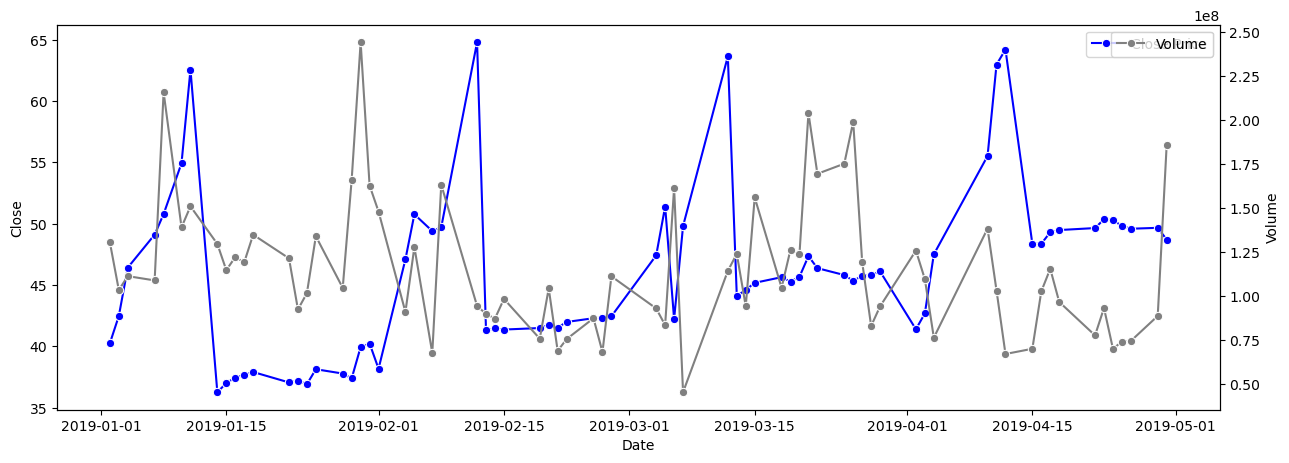

In [31]:
stock_daily = stock.groupby('Date').agg(
    {
        'Open': 'mean',
        'High': 'mean',
        'Low': 'mean',
        'Close': 'mean',
        'Volume': 'mean',
    }
).reset_index()  # Group the 'stocks' DataFrame by the 'Date' column

stock_daily.set_index('Date', inplace=True)
stock_daily.head()

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(15,5))

# Lineplot on primary y-axis
sns.lineplot(data=stock_daily.reset_index(), x='Date', y='Close', ax=ax1, color='blue', marker='o', label='Close Price')

# Create a secondary y-axis
ax2 = ax1.twinx()

# Lineplot on secondary y-axis
sns.lineplot(data=stock_daily.reset_index(), x='Date', y='Volume', ax=ax2, color='gray', marker='o', label='Volume')

ax1.legend(bbox_to_anchor=(1,1));

## **Data Preprocessing**

In [32]:
stock.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,349,2019-02-16 16:05:30.085959936,2019-01-02 00:00:00,2019-01-14 00:00:00,2019-02-05 00:00:00,2019-03-22 00:00:00,2019-04-30 00:00:00,NaN
Open,349.0,46.229233,37.567501,41.740002,45.974998,50.7075,66.817497,6.442817
High,349.0,46.700458,37.817501,42.244999,46.025002,50.849998,67.0625,6.507321
Low,349.0,45.745394,37.305,41.482498,45.639999,49.7775,65.862503,6.391976
Close,349.0,44.926317,36.254131,40.246914,44.596924,49.11079,64.805229,6.398338
Volume,349.0,128948236.103152,45448000.0,103272000.0,115627200.0,151125200.0,244439200.0,43170314.918964
Label,349.0,-0.054441,-1.0,-1.0,0.0,0.0,1.0,0.715119
news_len,349.0,49.312321,19.0,46.0,50.0,53.0,61.0,5.72777


In [33]:
stock = stock.drop("news_len",axis=1).reset_index()

## **Word Embeddings**

**Text Processing**

**Processing Details**
- Remove spefical characters
- Remove lower case characters
- Remove "Stopwords"
- Process Stemming

In [34]:
# defining a function to remove special characters
def remove_special_characters(text):
    # Defining the regex pattern to match non-alphanumeric characters
    pattern = '[^A-Za-z0-9]+'

    # Finding the specified pattern and replacing non-alphanumeric characters with a blank string
    new_text = ''.join(re.sub(pattern, ' ', text))

    return new_text

In [35]:
# Applying the function to remove special characters
stock['Cleaned_News'] = stock['News'].apply(remove_special_characters)

- Removed all special characters and white spaces - Created new column "Cleaned News"

In [36]:
# checking a couple of instances of cleaned data
stock.loc[0:3, ['News','Cleaned_News']]

,News,Cleaned_News
0,The tech sector experienced a significant dec...,The tech sector experienced a significant dec...
1,Apple lowered its fiscal Q1 revenue guidance ...,Apple lowered its fiscal Q1 revenue guidance ...
2,Apple cut its fiscal first quarter revenue fo...,Apple cut its fiscal first quarter revenue fo...
3,This news article reports that yields on long...,This news article reports that yields on long...


In [37]:
# changing the case of the text data to lower case
stock['Cleaned_News'] = stock['Cleaned_News'].str.lower()

- Converted into lower cases for all characters

In [38]:
# checking a couple of instances of cleaned data
stock.loc[0:3, ['News','Cleaned_News']]

,News,Cleaned_News
0,The tech sector experienced a significant dec...,the tech sector experienced a significant dec...
1,Apple lowered its fiscal Q1 revenue guidance ...,apple lowered its fiscal q1 revenue guidance ...
2,Apple cut its fiscal first quarter revenue fo...,apple cut its fiscal first quarter revenue fo...
3,This news article reports that yields on long...,this news article reports that yields on long...


In [39]:
# removing extra whitespaces from the text
stock['Cleaned_News'] = stock['Cleaned_News'].str.strip()

In [40]:
# checking a couple of instances of cleaned data
stock.loc[0:3, ['News','Cleaned_News']]

,News,Cleaned_News
0,The tech sector experienced a significant dec...,the tech sector experienced a significant decl...
1,Apple lowered its fiscal Q1 revenue guidance ...,apple lowered its fiscal q1 revenue guidance t...
2,Apple cut its fiscal first quarter revenue fo...,apple cut its fiscal first quarter revenue for...
3,This news article reports that yields on long...,this news article reports that yields on long ...


**Removing Spotwords and Stemming**

In [41]:
# defining a function to remove stop words using the NLTK library
def remove_stopwords(text):
    # Split text into separate words
    words = text.split()

    # Removing English language stopwords
    new_text = ' '.join([word for word in words if word not in stopwords.words('english')])

    return new_text

In [42]:
# Applying the function to remove stop words using the NLTK library
stock['Cleaned_News_without_stopwords'] = stock['Cleaned_News'].apply(remove_stopwords)

In [43]:
# checking a couple of instances of cleaned data
stock.loc[0:3, ['News','Cleaned_News', 'Cleaned_News_without_stopwords']]

,News,Cleaned_News,Cleaned_News_without_stopwords
0,The tech sector experienced a significant dec...,the tech sector experienced a significant decl...,tech sector experienced significant decline af...
1,Apple lowered its fiscal Q1 revenue guidance ...,apple lowered its fiscal q1 revenue guidance t...,apple lowered fiscal q1 revenue guidance 84 bi...
2,Apple cut its fiscal first quarter revenue fo...,apple cut its fiscal first quarter revenue for...,apple cut fiscal first quarter revenue forecas...
3,This news article reports that yields on long...,this news article reports that yields on long ...,news article reports yields long dated u treas...


- Removed "Stopwords", we can check in "Cleaned_News_without_stopwords"

In [44]:
# Loading the Porter Stemmer
ps = PorterStemmer()

In [45]:
# defining a function to perform stemming
def apply_porter_stemmer(text):
    # Split text into separate words
    words = text.split()

    # Applying the Porter Stemmer on every word of a message and joining the stemmed words back into a single string
    new_text = ' '.join([ps.stem(word) for word in words])

    return new_text

In [46]:
# Applying the function to perform stemming
stock['Final_cleaned_News'] = stock['Cleaned_News_without_stopwords'].apply(apply_porter_stemmer)

In [47]:
# checking a couple of instances of cleaned data
stock.loc[0:2,['News','Cleaned_News', 'Cleaned_News_without_stopwords','Final_cleaned_News']]

,News,Cleaned_News,Cleaned_News_without_stopwords,Final_cleaned_News
0,The tech sector experienced a significant dec...,the tech sector experienced a significant decl...,tech sector experienced significant decline af...,tech sector experienc signific declin aftermar...
1,Apple lowered its fiscal Q1 revenue guidance ...,apple lowered its fiscal q1 revenue guidance t...,apple lowered fiscal q1 revenue guidance 84 bi...,appl lower fiscal q1 revenu guidanc 84 billion...
2,Apple cut its fiscal first quarter revenue fo...,apple cut its fiscal first quarter revenue for...,apple cut fiscal first quarter revenue forecas...,appl cut fiscal first quarter revenu forecast ...


**Observations**
- After applied Data processing techniquest, we can see final News data in the field "Final_cleaned_News" column
- All data processing tehniques are applied

**Count Vectorizr - BOW (Bag of Words)**

In [48]:
# Initializing CountVectorizer with top 1000 words
bow_vec = CountVectorizer(max_features = 1000)

# Applying TfidfVectorizer on data
data_features_BOW = bow_vec.fit_transform(stock['Final_cleaned_News'])

# Convert the data features to array
data_features_BOW = data_features_BOW.toarray()

# Shape of the feature vector
data_features_BOW.shape

(349, 1000)

In [49]:
# Getting the 1000 words considered by the BoW model
words = bow_vec.get_feature_names_out()

In [50]:
# Checking the words considered by BoW model
words

array(['000', '06', '10', '100', '11', '13', '14', '15', '16', '17', '18',
       '20', '200', '2014', '2016', '2017', '2018', '2019', '2020', '21',
       '24', '25', '26', '28', '30', '300', '31', '36', '3d', '44', '49',
       '50', '500', '54', '5g', '60', '600', '67', '737', '75', '800',
       '84', '89', '93', '99', 'aac', 'aapl', 'accept', 'access',
       'accord', 'account', 'accus', 'acknowledg', 'acquisit', 'across',
       'activ', 'ad', 'addit', 'address', 'adjust', 'administr', 'adopt',
       'advanc', 'advantag', 'advertis', 'advis', 'aetna', 'affair',
       'affect', 'agenc', 'agre', 'agreement', 'ahead', 'aid', 'aim',
       'air', 'airpod', 'album', 'alexa', 'alibaba', 'alleg', 'allegedli',
       'allow', 'along', 'alphabet', 'alreadi', 'also', 'am', 'amazon',
       'american', 'amid', 'amidst', 'amount', 'analyst', 'android',
       'announc', 'annual', 'anoth', 'answer', 'anticip', 'antitrust',
       'app', 'appeal', 'appear', 'appl', 'appli', 'applic', 'appro

In [51]:
# Creating a DataFrame from the data features
df_BOW = pd.DataFrame(data_features_BOW, columns=bow_vec.get_feature_names_out())
df_BOW.head()

,000,06,10,100,11,13,14,15,16,17,...,xr,year,yen,yet,yield,york,yoy,yuan,zeux,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


- From the above dataframe, we can observe that the word is present only once in the 1, 3, & 4th document, none of the words are repeated in different documents

**Train / Test / Vakidation Data split**

In [52]:
X_train = stock[(stock['Date'] < '2019-04-01')].reset_index()
X_val = stock[(stock['Date'] >= '2019-04-01') & (stock['Date'] < '2019-04-16')].reset_index()
X_test = stock[stock['Date'] >= '2019-04-16'].reset_index()

In [53]:
X_train.head()

,level_0,index,Date,News,Open,High,Low,Close,Volume,Label,Cleaned_News,Cleaned_News_without_stopwords,Final_cleaned_News
0,0,0,2019-01-02,The tech sector experienced a significant dec...,41.740002,42.244999,41.482498,40.246914,130672400,-1,the tech sector experienced a significant decl...,tech sector experienced significant decline af...,tech sector experienc signific declin aftermar...
1,1,1,2019-01-02,Apple lowered its fiscal Q1 revenue guidance ...,41.740002,42.244999,41.482498,40.246914,130672400,-1,apple lowered its fiscal q1 revenue guidance t...,apple lowered fiscal q1 revenue guidance 84 bi...,appl lower fiscal q1 revenu guidanc 84 billion...
2,2,2,2019-01-02,Apple cut its fiscal first quarter revenue fo...,41.740002,42.244999,41.482498,40.246914,130672400,-1,apple cut its fiscal first quarter revenue for...,apple cut fiscal first quarter revenue forecas...,appl cut fiscal first quarter revenu forecast ...
3,3,3,2019-01-02,This news article reports that yields on long...,41.740002,42.244999,41.482498,40.246914,130672400,-1,this news article reports that yields on long ...,news article reports yields long dated u treas...,news articl report yield long date u treasuri ...
4,4,4,2019-01-02,Apple's revenue warning led to a decline in U...,41.740002,42.244999,41.482498,40.246914,130672400,-1,apple s revenue warning led to a decline in us...,apple revenue warning led decline usd jpy pair...,appl revenu warn led declin usd jpi pair gain ...


In [54]:
y_train = X_train["Label"].copy()
y_val = X_val["Label"].copy()
y_test = X_test["Label"].copy()

In [55]:
# X_train,X_val,X_test,y_train,y_val and y_test - Shape details
print("Train data shape",X_train.shape)
print("Validation data shape",X_val.shape)
print("Test data shape ",X_test.shape)

print("Train label shape",y_train.shape)
print("Validation label shape",y_val.shape)
print("Test label shape ",y_test.shape)

Train data shape (286, 13)
Validation data shape (21, 13)
Test data shape  (42, 13)
Train label shape (286,)
Validation label shape (21,)
Test label shape  (42,)


**Observations**
- Split data based on stock date
- Train set is having 'Date' < '2019-04-01' & Validation set - 'Date' >= '2019-04-01' and < '2019-04-16; Test set - 'Date' >= 2019-04-16
- High numbers are rows are added in Training set and good numbers records in Validation and Test set

## Word2Vec

In [56]:
# creating a list of all words in our data
words_list = [item.split(" ") for item in stock['Final_cleaned_News'].values]

In [57]:
# Checking the words from the first five reviews
words_list[0:5]

[['tech',
  'sector',
  'experienc',
  'signific',
  'declin',
  'aftermarket',
  'follow',
  'appl',
  'q1',
  'revenu',
  'warn',
  'notabl',
  'supplier',
  'includ',
  'skywork',
  'broadcom',
  'lumentum',
  'qorvo',
  'tsmc',
  'saw',
  'stock',
  'drop',
  'respons',
  'appl',
  'downward',
  'revis',
  'revenu',
  'expect',
  'quarter',
  'previous',
  'announc',
  'januari'],
 ['appl',
  'lower',
  'fiscal',
  'q1',
  'revenu',
  'guidanc',
  '84',
  'billion',
  'earlier',
  'estim',
  '89',
  '93',
  'billion',
  'due',
  'weaker',
  'expect',
  'iphon',
  'sale',
  'announc',
  'caus',
  'signific',
  'drop',
  'appl',
  'stock',
  'price',
  'neg',
  'impact',
  'relat',
  'supplier',
  'lead',
  'broader',
  'market',
  'declin',
  'tech',
  'indic',
  'nasdaq',
  '10'],
 ['appl',
  'cut',
  'fiscal',
  'first',
  'quarter',
  'revenu',
  'forecast',
  '89',
  '93',
  'billion',
  '84',
  'billion',
  'due',
  'weaker',
  'demand',
  'china',
  'fewer',
  'iphon',
  'upgr

In [58]:
# creating an instance of Word2Vec
model_W2V = Word2Vec(words_list, min_count = 1, workers = 6)

In [59]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(list(model_W2V.wv.key_to_index)))

Length of the vocabulary is 2580


Will check few word embeddings using the trained model.

In [60]:
# Checking the word embedding of a random word
word = "govern"
model_W2V.wv[word]

array([-0.00922218,  0.00187318, -0.00320777, -0.00497996,  0.00505987,
       -0.02405026, -0.0066885 ,  0.02895625, -0.00394042, -0.00436009,
       -0.00037694, -0.01710493,  0.00050459,  0.00782023,  0.00133274,
       -0.01130827, -0.0089712 , -0.01433702,  0.00319704, -0.02659107,
        0.00870974,  0.00743882,  0.00236226,  0.00052975, -0.00438977,
       -0.00531929, -0.01251627, -0.01690949, -0.00914267, -0.00219692,
        0.01455807,  0.00385781,  0.01117906, -0.00146037,  0.000208  ,
        0.01574395,  0.00631173, -0.0037734 , -0.00910934, -0.02392711,
        0.00150796, -0.00995155, -0.00707103, -0.00090726, -0.00171045,
        0.00360963,  0.00245259,  0.00043655,  0.0084081 ,  0.00524732,
        0.01480754, -0.00761899,  0.00421313, -0.00906566, -0.00028948,
        0.00480042,  0.01530457,  0.00374726, -0.00889729,  0.00610806,
       -0.00293626, -0.00158432, -0.0019932 , -0.0087573 , -0.01253331,
        0.01241227,  0.00791389,  0.00467771, -0.00815738,  0.00

In [61]:
# Checking top 5 similar words to the word 'govern'
similar = model_W2V.wv.similar_by_word('govern', topn=5)
print(similar)

[('weak', 0.815777063369751), ('year', 0.8153384923934937), ('appl', 0.812502384185791), ('revenu', 0.8063061833381653), ('china', 0.8050024509429932)]


In [62]:
# Checking top 5 similar words to the word 'news'
similar = model_W2V.wv.similar_by_word('news', topn=5)
print(similar)

[('appl', 0.7972287535667419), ('year', 0.7928430438041687), ('due', 0.778444766998291), ('share', 0.7769328355789185), ('declin', 0.7752698063850403)]


In [63]:
# Dictionary with key as words and the value as the embedding vector.
words = model_W2V.wv.key_to_index

In [64]:
def average_vectorizer_Word2Vec(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(words[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [65]:
# creating a dataframe of the vectorized documents
vec_size = 100
df_word2vec = pd.DataFrame(stock['Final_cleaned_News'].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
df_word2vec

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 90,Feature 91,Feature 92,Feature 93,Feature 94,Feature 95,Feature 96,Feature 97,Feature 98,Feature 99
0,424.656250,424.656250,424.656250,424.656250,424.656250,424.656250,424.656250,424.656250,424.656250,424.656250,...,424.656250,424.656250,424.656250,424.656250,424.656250,424.656250,424.656250,424.656250,424.656250,424.656250
1,194.918919,194.918919,194.918919,194.918919,194.918919,194.918919,194.918919,194.918919,194.918919,194.918919,...,194.918919,194.918919,194.918919,194.918919,194.918919,194.918919,194.918919,194.918919,194.918919,194.918919
2,307.450000,307.450000,307.450000,307.450000,307.450000,307.450000,307.450000,307.450000,307.450000,307.450000,...,307.450000,307.450000,307.450000,307.450000,307.450000,307.450000,307.450000,307.450000,307.450000,307.450000
3,255.970588,255.970588,255.970588,255.970588,255.970588,255.970588,255.970588,255.970588,255.970588,255.970588,...,255.970588,255.970588,255.970588,255.970588,255.970588,255.970588,255.970588,255.970588,255.970588,255.970588
4,448.657143,448.657143,448.657143,448.657143,448.657143,448.657143,448.657143,448.657143,448.657143,448.657143,...,448.657143,448.657143,448.657143,448.657143,448.657143,448.657143,448.657143,448.657143,448.657143,448.657143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,923.518519,923.518519,923.518519,923.518519,923.518519,923.518519,923.518519,923.518519,923.518519,923.518519,...,923.518519,923.518519,923.518519,923.518519,923.518519,923.518519,923.518519,923.518519,923.518519,923.518519
345,547.942857,547.942857,547.942857,547.942857,547.942857,547.942857,547.942857,547.942857,547.942857,547.942857,...,547.942857,547.942857,547.942857,547.942857,547.942857,547.942857,547.942857,547.942857,547.942857,547.942857
346,406.648649,406.648649,406.648649,406.648649,406.648649,406.648649,406.648649,406.648649,406.648649,406.648649,...,406.648649,406.648649,406.648649,406.648649,406.648649,406.648649,406.648649,406.648649,406.648649,406.648649
347,341.725000,341.725000,341.725000,341.725000,341.725000,341.725000,341.725000,341.725000,341.725000,341.725000,...,341.725000,341.725000,341.725000,341.725000,341.725000,341.725000,341.725000,341.725000,341.725000,341.725000


In [66]:
# creating a dataframe of the vectorized documents
start = time.time()

X_train_wv = pd.DataFrame(X_train["Final_cleaned_News"].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
X_val_wv = pd.DataFrame(X_val["Final_cleaned_News"].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
X_test_wv = pd.DataFrame(X_test["Final_cleaned_News"].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])

end = time.time()
print('Time taken ', (end-start))

Time taken  0.10100269317626953


In [67]:
print(X_train_wv.shape, X_val_wv.shape, X_test_wv.shape)

(286, 100) (21, 100) (42, 100)


**Observation**
- Created 350 feacture data columns
- We have used Vec size as 100

## Glove

In [69]:
# load the Stanford GloVe model
#filename = '/content/drive/MyDrive/AIML/NLPProject/glove.6B.100d.txt.word2vec'
filename = "C:/Users/vijay/Desktop/PGP-AIML/NLP Project/glove.6B.100d.txt.word2vec"
glove_model = KeyedVectors.load_word2vec_format(filename, binary=False)

In [70]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(glove_model.index_to_key))

Length of the vocabulary is 400000


In [71]:
# Checking the word embedding of a random word
word = "news"
glove_model[word]

array([-0.66842  , -0.41713  ,  0.42473  , -0.9329   , -0.36823  ,
       -0.26647  , -0.10715  ,  0.093359 ,  0.25288  , -0.42413  ,
        0.67356  ,  0.092664 ,  0.43201  , -0.25714  , -0.11222  ,
        0.059157 ,  0.33147  , -1.2479   , -0.35577  , -0.21875  ,
       -0.22346  ,  0.10209  , -0.4843   ,  0.7824   ,  0.3118   ,
       -0.083924 ,  0.56489  ,  0.98637  , -0.12308  ,  0.92539  ,
        0.28811  ,  0.4003   , -0.64225  ,  0.12647  , -0.27778  ,
        0.045568 , -0.18598  , -0.15247  , -0.42322  ,  0.29807  ,
       -0.68476  , -0.11121  , -1.1391   ,  0.072205 , -0.038877 ,
       -0.54775  , -0.0032873, -0.85587  ,  0.3267   , -0.79493  ,
        0.33434  ,  0.29464  ,  0.44074  ,  0.69114  , -0.10615  ,
       -2.5303   , -0.5923   ,  0.4648   ,  2.2093   ,  0.77166  ,
       -0.60216  ,  0.46264  , -0.70728  , -1.1414   ,  0.40916  ,
       -0.31745  ,  0.41431  ,  0.49908  ,  0.49434  ,  1.0044   ,
       -0.37273  , -0.16246  ,  0.23608  , -0.71456  ,  0.5331

In [72]:
# Checking the word embedding of a random word
word = "economy"
glove_model[word]

array([-0.19382  ,  1.017    ,  1.076    ,  0.02954  , -0.39192  ,
       -1.3891   , -0.87873  , -0.63162  ,  0.9643   , -0.43035  ,
       -0.34868  ,  0.22736  , -0.40296  ,  0.15641  , -0.16813  ,
       -0.15343  , -0.15799  , -0.27612  ,  0.18088  , -0.28386  ,
        0.49847  ,  0.29864  ,  0.32353  ,  0.18108  , -0.59623  ,
       -0.54165  , -0.70019  , -0.64956  , -0.69063  ,  0.18084  ,
       -0.38581  ,  0.56086  , -0.40313  , -0.38777  , -0.70615  ,
        0.20657  ,  0.34171  , -0.23393  , -0.35882  , -0.2201   ,
       -0.76182  , -1.2047   ,  0.4339   ,  1.1656   ,  0.1836   ,
       -0.21601  ,  0.93198  , -0.059616 , -0.11624  , -1.3259   ,
       -0.79772  , -0.0074957, -0.0889   ,  1.4749   ,  0.31157  ,
       -2.2952   , -0.058351 ,  0.39353  ,  1.4983   ,  0.74023  ,
       -0.20109  ,  0.098124 , -0.73081  , -0.32294  ,  0.16703  ,
        0.87431  , -0.041624 , -0.51022  ,  1.0737   , -0.4257   ,
        1.0581   ,  0.19859  , -0.60087  , -0.33906  ,  0.6024

In [73]:
# Retrieving the words present in the GloVe model's vocabulary
glove_words = glove_model.index_to_key

# Creating a dictionary of words and their corresponding vectors
glove_word_vector_dict = dict(zip(glove_model.index_to_key,list(glove_model.vectors)))

In [74]:
vec_size=100

In [75]:
def average_vectorizer_GloVe(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in glove_words]

    # Adding the vector representations of the words (with shape check)
    for word in words_in_vocab:
        word_vector = np.array(glove_word_vector_dict[word])
        # Check if the word vector has the expected shape
        if word_vector.shape == (vec_size,):
            feature_vector += word_vector
        else:
            # Handle or skip words with unexpected shapes (e.g., print a warning)
            print(f"Warning: Word '{word}' has unexpected shape {word_vector.shape}, skipping it.")

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [76]:
# creating a dataframe of the vectorized documents
df_glove = pd.DataFrame(stock['Final_cleaned_News'].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
df_glove

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 90,Feature 91,Feature 92,Feature 93,Feature 94,Feature 95,Feature 96,Feature 97,Feature 98,Feature 99
0,0.021671,0.096785,-0.047464,-0.066726,-0.215078,-0.603108,-0.089054,-0.001979,0.114239,-0.132121,...,-0.016118,0.282037,-0.146394,-0.217284,-0.137730,0.162514,0.208869,0.056668,0.186156,-0.025540
1,0.171825,0.341351,0.234650,-0.042054,-0.082840,-0.600302,-0.060674,-0.101788,-0.159387,0.023604,...,0.001762,0.271578,-0.190244,-0.136070,-0.442046,0.225178,0.175980,-0.036701,0.410090,-0.159631
2,0.010512,0.270341,0.301482,-0.087113,0.075485,-0.476547,-0.039534,-0.014161,-0.123561,-0.054536,...,0.113562,0.199301,-0.095302,-0.220799,-0.559601,0.130351,0.039756,-0.088995,0.484577,-0.204774
3,-0.147407,0.226970,0.377158,0.184659,-0.110523,-0.447424,-0.103314,0.033698,-0.021951,-0.041905,...,0.031969,0.314802,-0.276519,0.034750,-0.347012,0.131816,0.201519,-0.220721,0.328415,-0.101222
4,0.040798,0.198312,0.071460,0.037332,-0.098294,-0.407203,-0.078844,-0.102327,-0.132380,-0.031861,...,0.041134,0.188611,-0.051261,-0.364269,-0.216124,0.242409,0.243280,-0.071136,0.173813,-0.131392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,-0.133417,0.058861,0.415255,-0.291097,0.051498,0.079182,0.057609,0.127537,-0.074177,-0.070428,...,0.306373,-0.166262,0.083386,-0.120771,-0.347820,0.049615,-0.054991,-0.299478,0.437251,0.188692
345,0.159967,0.246612,0.288849,0.093632,0.043483,-0.284527,-0.167188,-0.049947,-0.246812,-0.088806,...,0.042174,0.246746,-0.054319,-0.047361,-0.572373,0.368322,0.077437,0.020181,0.441181,0.015956
346,0.043433,0.127144,0.151791,-0.053902,-0.067352,-0.187623,-0.020754,0.138385,-0.354622,-0.084654,...,-0.066027,0.240859,-0.119884,-0.026659,-0.428011,0.054745,-0.025141,-0.129436,0.258558,-0.027775
347,-0.098248,0.090049,0.181622,-0.028409,-0.128997,-0.497643,-0.247336,-0.034014,-0.103773,-0.195073,...,0.012848,0.070933,-0.053851,-0.265540,-0.415342,0.111974,0.295720,-0.207213,0.378713,0.026234


In [77]:
# creating a dataframe of the vectorized documents
start = time.time()

X_train_gl = pd.DataFrame(X_train["Final_cleaned_News"].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
X_val_gl = pd.DataFrame(X_val["Final_cleaned_News"].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
X_test_gl = pd.DataFrame(X_test["Final_cleaned_News"].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])

end = time.time()
print('Time taken ', (end-start))

Time taken  44.377153396606445


In [78]:
print(X_train_gl.shape, X_val_gl.shape, X_test_gl.shape) #

(286, 100) (21, 100) (42, 100)


## Sentence Transformer

In [172]:
!pip install hf_xet

   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   --------------------------- ------------ 1.6/2.3 MB 10.5 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 8.2 MB/s eta 0:00:00


In [173]:
#Defining the model
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

In [174]:
# setting the device to GPU if available, else CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [175]:
# encoding the dataset
embedding_matrix = model.encode(stock['Final_cleaned_News'], device=device, show_progress_bar=True)

Batches:   0%|          | 0/11 [00:00<?, ?it/s]

In [176]:
# printing the shape of the embedding matrix
embedding_matrix.shape

(349, 384)

In [177]:
# printing the embedding vector of the first review in the dataset
embedding_matrix[0,:]

array([-4.35229465e-02, -3.29503790e-02,  1.18766539e-02, -2.81184036e-02,
       -4.92299497e-02, -3.22515182e-02,  6.49221241e-02,  8.59605670e-02,
       -5.15836850e-03, -7.01683573e-03,  6.41608834e-02,  6.85867947e-03,
        5.48729999e-03, -1.17762797e-02, -2.30297837e-02, -6.20182492e-02,
        3.91361071e-03, -3.52360755e-02, -8.98560658e-02, -6.32310286e-02,
       -4.57198545e-02, -7.06845522e-02, -5.99571541e-02,  2.73746066e-02,
       -1.07715679e-02, -3.64985801e-02,  1.46401338e-02,  7.55968615e-02,
        4.79061119e-02, -1.22141279e-01, -5.15050068e-02,  1.34289771e-01,
        4.91506569e-02,  3.63531299e-02,  1.16165336e-02,  1.05563253e-02,
       -6.83338963e-04, -4.49275710e-02,  4.31670956e-02, -1.22120082e-02,
       -5.07503338e-02, -8.38373601e-02, -1.05264373e-01, -5.41449673e-02,
        7.20377266e-02, -6.95497915e-02, -4.93148826e-02,  2.94028688e-02,
        8.44291523e-02,  1.61983781e-02, -2.72225067e-02,  5.01878373e-02,
        6.29153196e-03,  

## Data Pre-processing

In [178]:
# Creating dependent and independent variables
X_bow = df_BOW.copy()
X_word2vec = df_word2vec.copy()
X_glove = df_glove.copy()
X_sent = embedding_matrix.copy()
y = stock['Label']

In [179]:
def split(X,y):
    # Initial split into training (80%) and testing (20%)
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

    # Further split the temporary set into validation (10%) and test (10%) sets
    X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42)

    return X_train,X_valid,X_test,y_train,y_valid,y_test

In [180]:
#Splitting the dataset.
X_train_bow,X_valid_bow,X_test_bow,y_train_bow,y_valid_bow,y_test_bow=split(X_bow,y)
X_train_word2vec,X_valid_word2vec,X_test_word2vec,y_train_word2vec,y_valid_word2vec,y_test_word2vec=split(X_word2vec,y)
X_train_glove,X_valid_glove,X_test_glove,y_train_glove,y_valid_glove,y_test_glove=split(X_glove,y)
X_train_sent,X_valid_sent,X_test_sent,y_train_sent,y_valid_sent,y_test_sent=split(X_sent,y)

In [181]:
print(X_train_bow.shape, X_test_bow.shape, X_valid_bow.shape)
print(X_train_word2vec.shape, X_test_word2vec.shape, X_valid_word2vec.shape)
print(X_train_glove.shape, X_test_glove.shape, X_valid_glove.shape)
print(X_train_sent.shape, X_test_sent.shape, X_valid_sent.shape)

(279, 1000) (35, 1000) (35, 1000)
(279, 100) (35, 100) (35, 100)
(279, 100) (35, 100) (35, 100)
(279, 384) (35, 384) (35, 384)


In [182]:
print(y_train_bow.shape, y_test_bow.shape, y_valid_bow, y)
print(y_train_word2vec.shape, y_test_word2vec.shape, y_valid_word2vec.shape)
print(y_train_glove.shape, y_test_glove.shape, y_valid_glove.shape)
print(y_train_sent.shape, y_test_sent.shape, y_valid_sent.shape)

(279,) (35,) 321   -1
89     0
315   -1
117    1
1     -1
152   -1
261    1
99     1
276    0
342    0
217   -1
219    0
33    -1
213    0
340    0
19     0
197   -1
251    0
207    1
68     1
270    0
303    1
5      0
64     0
189    0
96     1
253   -1
254    0
36     0
280    0
296   -1
86     1
329   -1
277    0
199    0
Name: Label, dtype: int64 0     -1
1     -1
2     -1
3     -1
4     -1
      ..
344   -1
345   -1
346   -1
347   -1
348    0
Name: Label, Length: 349, dtype: int64
(279,) (35,) (35,)
(279,) (35,) (35,)
(279,) (35,) (35,)


## **Sentiment Analysis**

In [183]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Random Forest (Default with BOW)

In [184]:
# Building the model
rf_bow = RandomForestClassifier(random_state = 42)

# Fitting on train data
rf_bow.fit(X_train_bow, y_train_bow)

RandomForestClassifier(random_state=42)

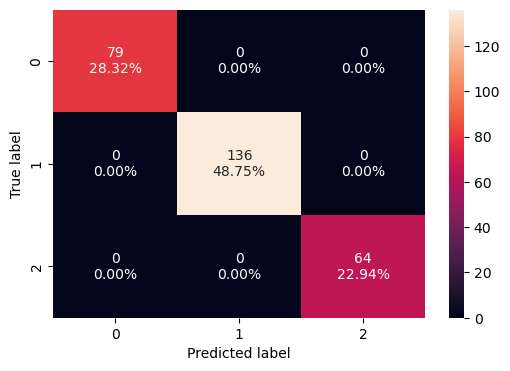

In [185]:
confusion_matrix_sklearn(rf_bow, X_train_bow, y_train_bow)

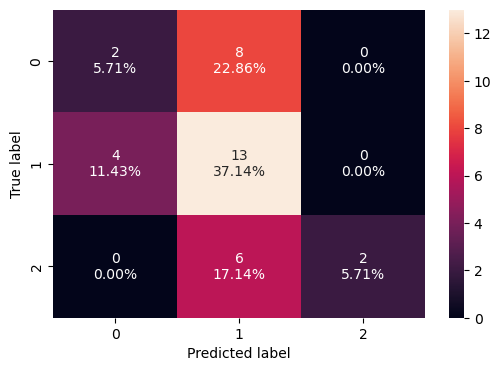

In [186]:
confusion_matrix_sklearn(rf_bow, X_valid_bow, y_valid_bow)

In [187]:
# Predicting on train data
y_pred_train_bow = rf_bow.predict(X_train_bow)

# Predicting on validation data
y_pred_valid_bow = rf_bow.predict(X_valid_bow)

**Classfication Report**

In [270]:
CL_bow_Train_base = pd.DataFrame(classification_report(y_train_bow, y_pred_train_bow,digits=2,output_dict=True)).T
print(CL_bow_Train_base)

              precision  recall  f1-score  support
-1                  1.0     1.0       1.0     79.0
0                   1.0     1.0       1.0    136.0
1                   1.0     1.0       1.0     64.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0    279.0
weighted avg        1.0     1.0       1.0    279.0


In [271]:
CL_bow_Valid_base = pd.DataFrame(classification_report(y_valid_bow, y_pred_valid_bow,digits=2,output_dict=True)).T
print(CL_bow_Valid_base)

              precision    recall  f1-score    support
-1             0.250000  0.200000  0.222222  10.000000
0              0.440000  0.647059  0.523810  17.000000
1              1.000000  0.250000  0.400000   8.000000
accuracy       0.428571  0.428571  0.428571   0.428571
macro avg      0.563333  0.365686  0.382011  35.000000
weighted avg   0.513714  0.428571  0.409342  35.000000


**Observations**
- This model acheived ~71% on recall scope in Netrual values however very low recall scope for Positive and Negative values
- Model is having challange to idetifiy postive and negative details
- This could be due to imbalance dataset (Netrual data is 2 times higher than Postivie or Negative data set

## Random Forest Model (default with Word2Vec)

In [190]:
# Building the model
rf_bow = RandomForestClassifier(random_state = 42)

# Fitting on train data
rf_bow.fit(X_train_word2vec, y_train_word2vec)

RandomForestClassifier(random_state=42)

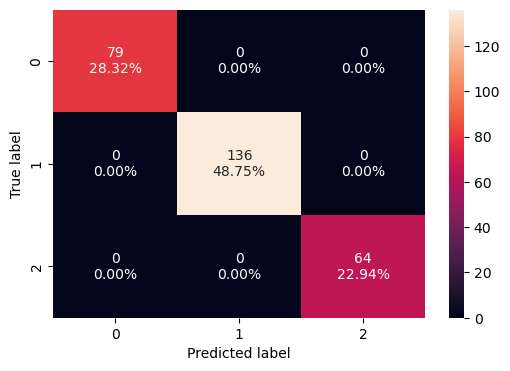

In [191]:
confusion_matrix_sklearn(rf_bow, X_train_word2vec, y_train_word2vec)

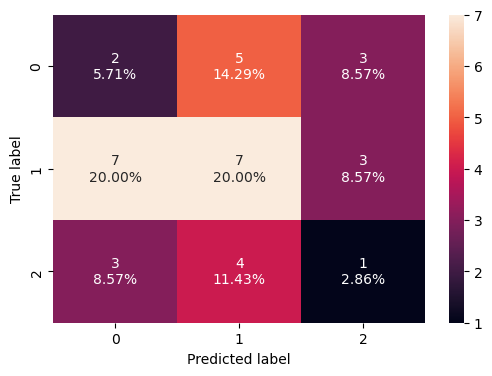

In [192]:
confusion_matrix_sklearn(rf_bow, X_valid_word2vec, y_valid_word2vec)

In [193]:
# Predicting on train data
y_pred_train_word2vec = rf_bow.predict(X_train_word2vec)

# Predicting on validation data
y_pred_valid_word2vec = rf_bow.predict(X_valid_word2vec)

**Classification Report**

In [194]:
print(classification_report(y_train_word2vec, y_pred_train_word2vec))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        79
           0       1.00      1.00      1.00       136
           1       1.00      1.00      1.00        64

    accuracy                           1.00       279
   macro avg       1.00      1.00      1.00       279
weighted avg       1.00      1.00      1.00       279



In [273]:
CL_W2V_Train_base = pd.DataFrame(classification_report(y_train_word2vec, y_pred_train_word2vec,digits=2,output_dict=True)).T
print(CL_W2V_Train_base)

              precision    recall  f1-score     support
-1             0.489583  0.594937  0.537143   79.000000
0              0.732143  0.602941  0.661290  136.000000
1              0.549296  0.609375  0.577778   64.000000
accuracy       0.602151  0.602151  0.602151    0.602151
macro avg      0.590341  0.602418  0.592070  279.000000
weighted avg   0.621518  0.602151  0.606980  279.000000


In [195]:
print(classification_report(y_valid_word2vec, y_pred_valid_word2vec))

              precision    recall  f1-score   support

          -1       0.17      0.20      0.18        10
           0       0.44      0.41      0.42        17
           1       0.14      0.12      0.13         8

    accuracy                           0.29        35
   macro avg       0.25      0.25      0.25        35
weighted avg       0.29      0.29      0.29        35



In [274]:
CL_W2V_Valid_base = pd.DataFrame(classification_report(y_valid_word2vec, y_pred_valid_word2vec,digits=2,output_dict=True)).T
print(CL_W2V_Valid_base)

              precision    recall  f1-score    support
-1             0.312500  0.500000  0.384615  10.000000
0              0.333333  0.235294  0.275862  17.000000
1              0.285714  0.250000  0.266667   8.000000
accuracy       0.314286  0.314286  0.314286   0.314286
macro avg      0.310516  0.328431  0.309048  35.000000
weighted avg   0.316497  0.314286  0.304833  35.000000


**Observation**
- Recall scope is very poor for Postive, Negative and Netural dataset
- It failed to identify the data for most the cases, this could be due to imblance dataset

## Random Forest Model (default with GloVe)

In [196]:
# Building the model
rf_bow = RandomForestClassifier(random_state = 42)

# Fitting on train data
rf_bow.fit(X_train_glove, y_train_glove)

RandomForestClassifier(random_state=42)

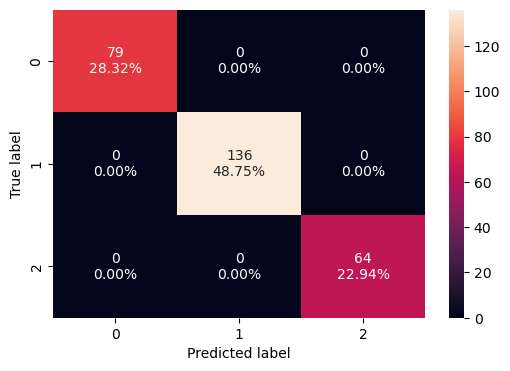

In [197]:
confusion_matrix_sklearn(rf_bow, X_train_glove, y_train_glove)

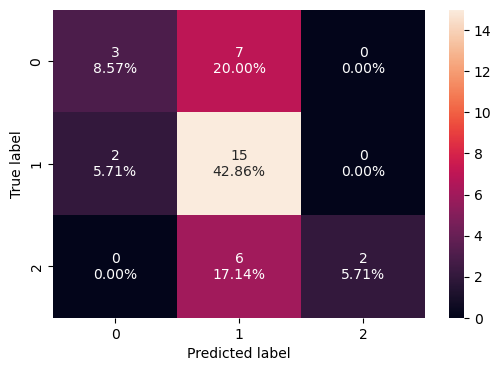

In [198]:
confusion_matrix_sklearn(rf_bow, X_valid_glove, y_valid_glove)

In [199]:
# Predicting on train data
y_pred_train_glove = rf_bow.predict(X_train_glove)

# Predicting on validation data
y_pred_valid_glove = rf_bow.predict(X_valid_glove)

**Classification Report**

In [276]:
CL_glo_Train_base = pd.DataFrame(classification_report(y_train_glove, y_pred_train_glove,digits=2,output_dict=True)).T
print(CL_glo_Train_base)

              precision    recall  f1-score     support
-1             1.000000  1.000000  1.000000   79.000000
0              0.992701  1.000000  0.996337  136.000000
1              1.000000  0.984375  0.992126   64.000000
accuracy       0.996416  0.996416  0.996416    0.996416
macro avg      0.997567  0.994792  0.996154  279.000000
weighted avg   0.996442  0.996416  0.996408  279.000000


In [277]:
CL_glo_Valid_base = pd.DataFrame(classification_report(y_valid_glove, y_pred_valid_glove,digits=2,output_dict=True)).T
print(CL_glo_Valid_base)

              precision    recall  f1-score    support
-1             0.100000  0.100000  0.100000  10.000000
0              0.416667  0.588235  0.487805  17.000000
1              0.000000  0.000000  0.000000   8.000000
accuracy       0.314286  0.314286  0.314286   0.314286
macro avg      0.172222  0.229412  0.195935  35.000000
weighted avg   0.230952  0.314286  0.265505  35.000000


**Observations**
- Same like above model, we are seeing similar challanges in this model
- Recall score for Netural  and postive data is very low

## Randamforest (with Default Sentence Transformer)

In [202]:
# Building the model
rf_transformer = RandomForestClassifier(n_estimators = 100, max_depth = 7, random_state = 42)

# Fitting on train data
rf_transformer.fit(X_train_sent, y_train_sent)

RandomForestClassifier(max_depth=7, random_state=42)

In [203]:
# Predicting on train data
y_pred_train_sent = rf_transformer.predict(X_train_sent)

# Predicting on test data
y_pred_valid_sent = rf_transformer.predict(X_valid_sent)

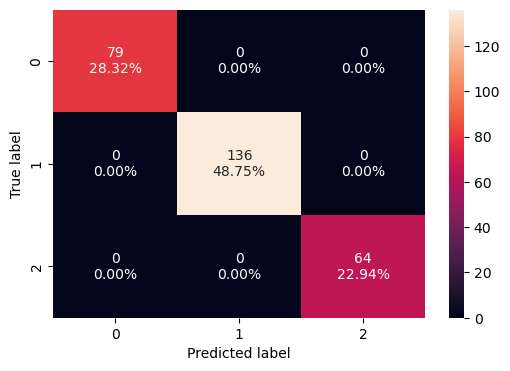

In [204]:
confusion_matrix_sklearn(rf_transformer, X_train_sent, y_train_sent)

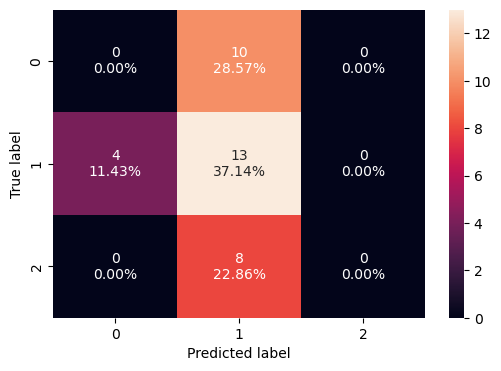

In [205]:
confusion_matrix_sklearn(rf_transformer, X_valid_sent, y_valid_sent)

**Classification Report**

In [279]:
CL_sent_Train_base = pd.DataFrame(classification_report(y_train_sent, y_pred_train_sent,digits=2,output_dict=True)).T
print(CL_sent_Train_base)

              precision  recall  f1-score  support
-1                  1.0     1.0       1.0     79.0
0                   1.0     1.0       1.0    136.0
1                   1.0     1.0       1.0     64.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0    279.0
weighted avg        1.0     1.0       1.0    279.0


In [280]:
CL_sent_Valid_base = pd.DataFrame(classification_report(y_valid_sent, y_pred_valid_sent,digits=2,output_dict=True)).T
print(CL_sent_Valid_base)

              precision    recall  f1-score    support
-1             0.000000  0.000000  0.000000  10.000000
0              0.419355  0.764706  0.541667  17.000000
1              0.000000  0.000000  0.000000   8.000000
accuracy       0.371429  0.371429  0.371429   0.371429
macro avg      0.139785  0.254902  0.180556  35.000000
weighted avg   0.203687  0.371429  0.263095  35.000000


## Random Forest (with class_weights and BOW)

In [208]:
rf_bow_balanced = RandomForestClassifier(class_weight="balanced", random_state=42)
rf_bow_balanced.fit(X_train_bow, y_train_bow)

RandomForestClassifier(class_weight='balanced', random_state=42)

**Confustion Matrix**

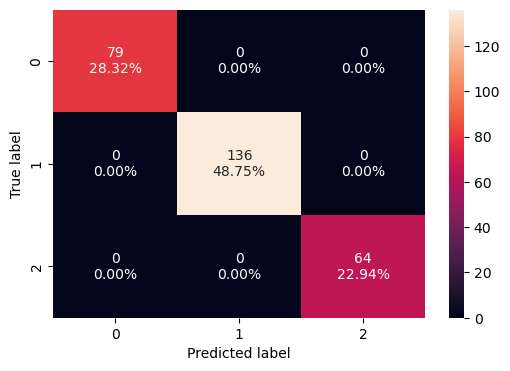

In [209]:
confusion_matrix_sklearn(rf_bow_balanced, X_train_bow, y_train_bow)

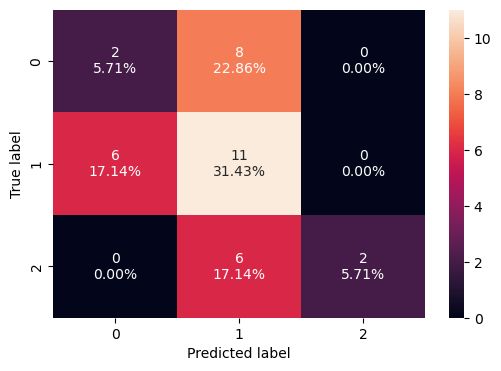

In [210]:
confusion_matrix_sklearn(rf_bow_balanced, X_valid_bow, y_valid_bow)

In [211]:
# Predicting on train data
y_pred_train_bow = rf_bow_balanced.predict(X_train_bow)

# Predicting on test data
y_pred_valid_bow = rf_bow_balanced.predict(X_valid_bow)

**Classification Report**

In [281]:
CL_bow_Train_cw = pd.DataFrame(classification_report(y_train_bow, y_pred_train_bow,digits=2,output_dict=True)).T
print(CL_bow_Train_cw)

              precision  recall  f1-score  support
-1                  1.0     1.0       1.0     79.0
0                   1.0     1.0       1.0    136.0
1                   1.0     1.0       1.0     64.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0    279.0
weighted avg        1.0     1.0       1.0    279.0


In [282]:
CL_bow_Valid_cw = pd.DataFrame(classification_report(y_valid_bow, y_pred_valid_bow,digits=2,output_dict=True)).T
print(CL_bow_Valid_cw)

              precision    recall  f1-score    support
-1             0.250000  0.200000  0.222222  10.000000
0              0.440000  0.647059  0.523810  17.000000
1              1.000000  0.250000  0.400000   8.000000
accuracy       0.428571  0.428571  0.428571   0.428571
macro avg      0.563333  0.365686  0.382011  35.000000
weighted avg   0.513714  0.428571  0.409342  35.000000


## Random Forest (with class_weights and Word2Vec)

In [214]:
rf_word2vec_balanced = RandomForestClassifier(class_weight="balanced", random_state=42)
rf_word2vec_balanced.fit(X_train_word2vec, y_train_word2vec)

RandomForestClassifier(class_weight='balanced', random_state=42)

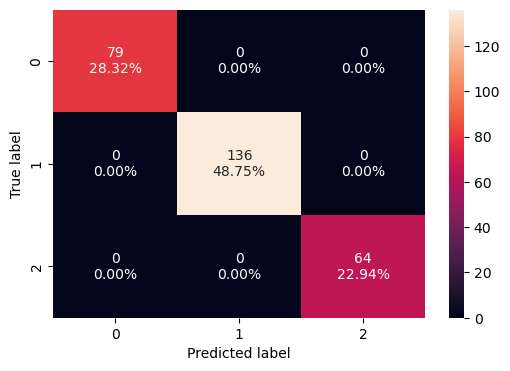

In [215]:
confusion_matrix_sklearn(rf_word2vec_balanced, X_train_word2vec, y_train_word2vec)

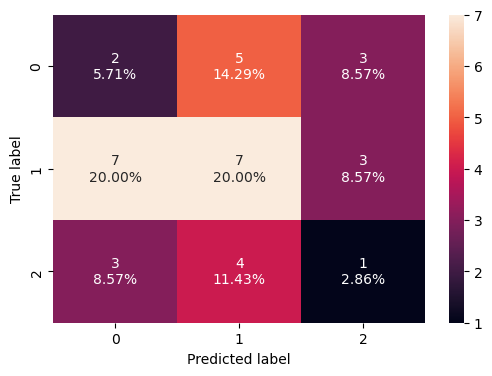

In [216]:
confusion_matrix_sklearn(rf_word2vec_balanced, X_valid_word2vec, y_valid_word2vec)

In [217]:
# Predicting on train data
y_pred_train = rf_word2vec_balanced.predict(X_train_word2vec)

# Predicting on test data
y_pred_valid = rf_word2vec_balanced.predict(X_valid_word2vec)

**Classification Report**

In [283]:
CL_w2v_Train_cw = pd.DataFrame(classification_report(y_train_word2vec, y_pred_train_word2vec,digits=2,output_dict=True)).T
print(CL_w2v_Train_cw)

              precision    recall  f1-score     support
-1             0.489583  0.594937  0.537143   79.000000
0              0.732143  0.602941  0.661290  136.000000
1              0.549296  0.609375  0.577778   64.000000
accuracy       0.602151  0.602151  0.602151    0.602151
macro avg      0.590341  0.602418  0.592070  279.000000
weighted avg   0.621518  0.602151  0.606980  279.000000


In [284]:
CL_w2v_Valid_cw = pd.DataFrame(classification_report(y_valid_word2vec, y_pred_valid_word2vec,digits=2,output_dict=True)).T
print(CL_w2v_Valid_cw)

              precision    recall  f1-score    support
-1             0.312500  0.500000  0.384615  10.000000
0              0.333333  0.235294  0.275862  17.000000
1              0.285714  0.250000  0.266667   8.000000
accuracy       0.314286  0.314286  0.314286   0.314286
macro avg      0.310516  0.328431  0.309048  35.000000
weighted avg   0.316497  0.314286  0.304833  35.000000


## Random Forest (with class_weights and GloVe)

In [220]:
rf_glove_balanced = RandomForestClassifier(class_weight="balanced", random_state=42)
rf_glove_balanced.fit(X_train_glove, y_train_glove)

RandomForestClassifier(class_weight='balanced', random_state=42)

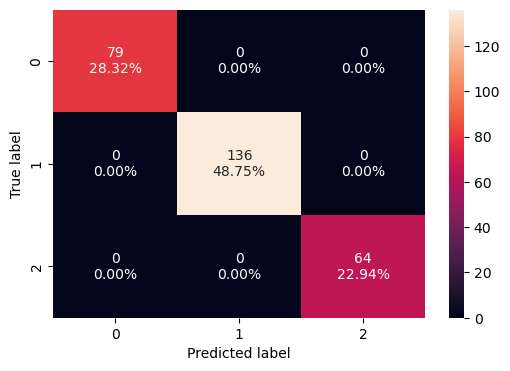

In [221]:
confusion_matrix_sklearn(rf_glove_balanced, X_train_glove, y_train_glove)

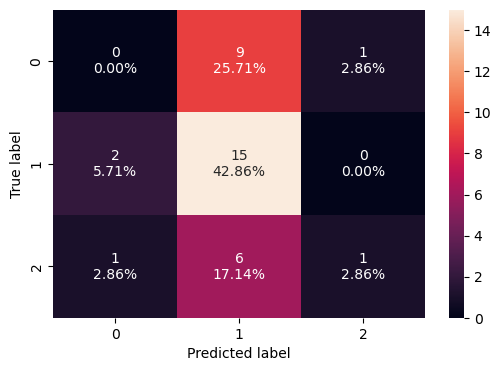

In [222]:
confusion_matrix_sklearn(rf_glove_balanced, X_valid_glove, y_valid_glove)

In [223]:
# Predicting on train data
y_pred_train = rf_glove_balanced.predict(X_train_glove)

# Predicting on test data
y_pred_valid = rf_glove_balanced.predict(X_valid_glove)

**Classification Report**

In [285]:
CL_Glo_Train_cw = pd.DataFrame(classification_report(y_train_glove, y_pred_train_glove,digits=2,output_dict=True)).T
print(CL_Glo_Train_cw)

              precision    recall  f1-score     support
-1             1.000000  1.000000  1.000000   79.000000
0              0.992701  1.000000  0.996337  136.000000
1              1.000000  0.984375  0.992126   64.000000
accuracy       0.996416  0.996416  0.996416    0.996416
macro avg      0.997567  0.994792  0.996154  279.000000
weighted avg   0.996442  0.996416  0.996408  279.000000


In [286]:
CL_Glo_Valid_cw = pd.DataFrame(classification_report(y_valid_glove, y_pred_valid_glove,digits=2,output_dict=True)).T
print(CL_Glo_Valid_cw)

              precision    recall  f1-score    support
-1             0.100000  0.100000  0.100000  10.000000
0              0.416667  0.588235  0.487805  17.000000
1              0.000000  0.000000  0.000000   8.000000
accuracy       0.314286  0.314286  0.314286   0.314286
macro avg      0.172222  0.229412  0.195935  35.000000
weighted avg   0.230952  0.314286  0.265505  35.000000


## Random Forest (with hyperparamter tuning and Word2Vec)

In [226]:
# Choose the type of classifier
rf_tuned = RandomForestClassifier(class_weight="balanced", random_state=42)

# defining the hyperparameter grid for tuning
parameters = {
    "max_depth": list(np.arange(4, 15, 2)),
    "max_features": ["sqrt", 0.5, 0.7],
    "min_samples_split": [5, 6, 7],
    "n_estimators": np.arange(30, 110, 200),
     "criterion": ['gini', 'entropy']
}

# defining the type of scoring used to compare parameter combinations
# we need to specify the mechanism of averaging as we have more than 2 target classes
scorer = metrics.make_scorer(metrics.recall_score, average='weighted')

# running the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=3, n_jobs=-1)
grid_obj = grid_obj.fit(X_train_word2vec, y_train_word2vec)

In [227]:
# Creating a new model with the best combination of parameters
rf_word2vec_tuned = grid_obj.best_estimator_

# Fit the new model to the data
rf_word2vec_tuned.fit(X_train_word2vec, y_train_word2vec)

RandomForestClassifier(class_weight='balanced', max_depth=4,
                       min_samples_split=7, n_estimators=30, random_state=42)

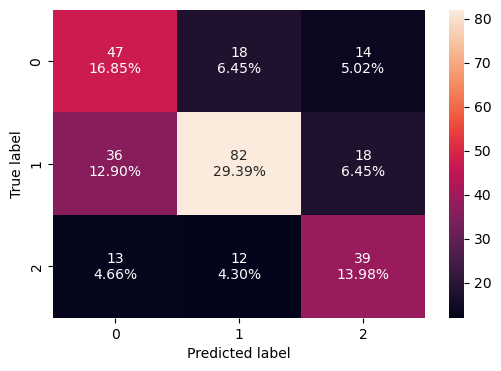

In [228]:
confusion_matrix_sklearn(rf_word2vec_tuned, X_train_word2vec, y_train_word2vec)

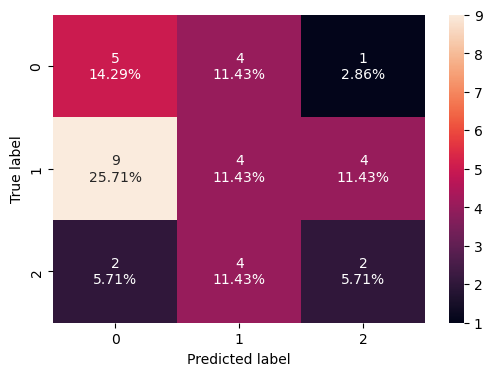

In [229]:
confusion_matrix_sklearn(rf_word2vec_tuned, X_valid_word2vec, y_valid_word2vec)

In [230]:
# Predicting on train data
y_pred_train_word2vec = rf_word2vec_tuned.predict(X_train_word2vec)

# Predicting on validation data
y_pred_valid_word2vec = rf_word2vec_tuned.predict(X_valid_word2vec)

**Classification Report**

In [287]:
CL_W2V_Train_hyp = pd.DataFrame(classification_report(y_train_word2vec, y_pred_train_word2vec,digits=2,output_dict=True)).T
print(CL_W2V_Train_hyp)

              precision    recall  f1-score     support
-1             0.489583  0.594937  0.537143   79.000000
0              0.732143  0.602941  0.661290  136.000000
1              0.549296  0.609375  0.577778   64.000000
accuracy       0.602151  0.602151  0.602151    0.602151
macro avg      0.590341  0.602418  0.592070  279.000000
weighted avg   0.621518  0.602151  0.606980  279.000000


In [288]:
CL_W2V_Valdi_hyp = pd.DataFrame(classification_report(y_valid_word2vec, y_pred_valid_word2vec,digits=2,output_dict=True)).T
print(CL_W2V_Valdi_hyp)

              precision    recall  f1-score    support
-1             0.312500  0.500000  0.384615  10.000000
0              0.333333  0.235294  0.275862  17.000000
1              0.285714  0.250000  0.266667   8.000000
accuracy       0.314286  0.314286  0.314286   0.314286
macro avg      0.310516  0.328431  0.309048  35.000000
weighted avg   0.316497  0.314286  0.304833  35.000000


## Use Oversampling Data

In [233]:
# Fit SMOTE on train data(Synthetic Minority Oversampling Technique)
sm = SMOTE( k_neighbors=5, random_state=1)
X_train_over_w2v, y_train_over_w2v = sm.fit_resample(X_train_word2vec, y_train_word2vec)

In [234]:
# Creating a new model with the best combination of parameters
rf_word2vec_tuned = grid_obj.best_estimator_

# Fit the new model to the data
rf_word2vec_tuned.fit(X_train_over_w2v, y_train_over_w2v)

RandomForestClassifier(class_weight='balanced', max_depth=4,
                       min_samples_split=7, n_estimators=30, random_state=42)

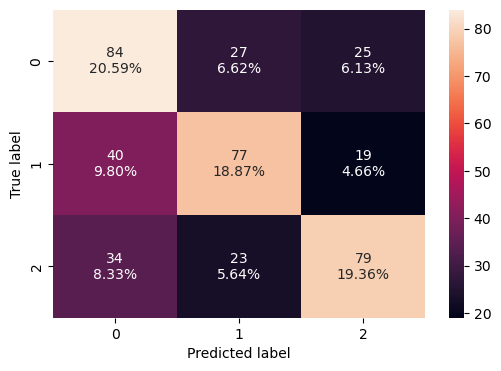

In [235]:
confusion_matrix_sklearn(rf_word2vec_tuned, X_train_over_w2v, y_train_over_w2v)

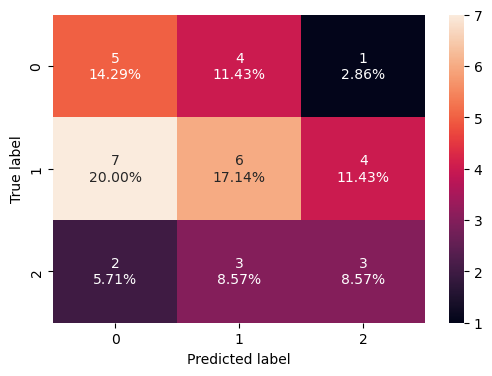

In [236]:
confusion_matrix_sklearn(rf_word2vec_tuned, X_valid_word2vec, y_valid_word2vec)

In [237]:
# Predicting on train data
y_pred_train_word2vec1 = rf_word2vec_tuned.predict(X_train_over_w2v)

In [238]:
# Predicting on validation data
y_pred_valid_word2vec1 = rf_word2vec_tuned.predict(X_valid_word2vec)

In [289]:
CL_W2V_Train_hyp_os = pd.DataFrame(classification_report(y_train_over_w2v, y_pred_train_word2vec1,digits=2,output_dict=True)).T
print(CL_W2V_Train_hyp_os)

              precision    recall  f1-score     support
-1             0.531646  0.617647  0.571429  136.000000
0              0.606299  0.566176  0.585551  136.000000
1              0.642276  0.580882  0.610039  136.000000
accuracy       0.588235  0.588235  0.588235    0.588235
macro avg      0.593407  0.588235  0.589006  408.000000
weighted avg   0.593407  0.588235  0.589006  408.000000


In [290]:
CL_W2V_Valid_hyp_os = pd.DataFrame(classification_report(y_valid_word2vec, y_pred_valid_word2vec1,digits=2,output_dict=True)).T
print(CL_W2V_Valid_hyp_os)

              precision    recall  f1-score  support
-1             0.357143  0.500000  0.416667     10.0
0              0.461538  0.352941  0.400000     17.0
1              0.375000  0.375000  0.375000      8.0
accuracy       0.400000  0.400000  0.400000      0.4
macro avg      0.397894  0.409314  0.397222     35.0
weighted avg   0.411931  0.400000  0.399048     35.0


## Random Forest (with hyperparametertuning and GloVe)

In [241]:
# Choose the type of classifier
rf_tuned = RandomForestClassifier(class_weight="balanced", random_state=42)

# defining the hyperparameter grid for tuning
parameters = {
    "max_depth": list(np.arange(4, 15, 2)),
    "max_features": ["sqrt", 0.5, 0.7],
    "min_samples_split": [5, 6, 7],
    "n_estimators": np.arange(30, 110, 200),
     "criterion": ['gini', 'entropy']
}

# defining the type of scoring used to compare parameter combinations
# we need to specify the mechanism of averaging as we have more than 2 target classes
scorer = metrics.make_scorer(metrics.recall_score, average='weighted')

# running the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,  cv=3, n_jobs=-1)
grid_obj = grid_obj.fit(X_train_glove, y_train_glove)

In [242]:
# Creating a new model with the best combination of parameters
rf_glove_tuned = grid_obj.best_estimator_

# Fit the new model to the data
rf_glove_tuned.fit(X_train_glove, y_train_glove)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=7, n_estimators=30, random_state=42)

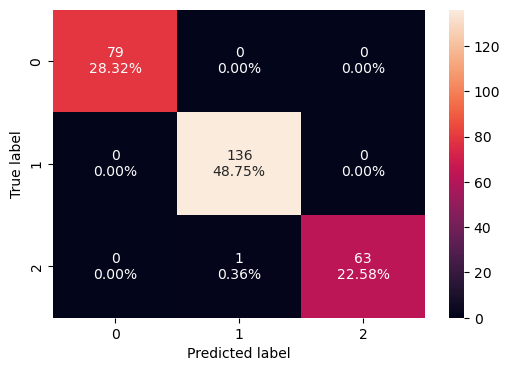

In [243]:
#Printing the confusion matrix
confusion_matrix_sklearn(rf_glove_tuned, X_train_glove, y_train_glove)

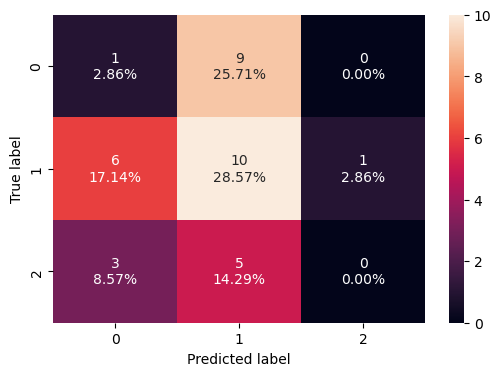

In [244]:
#Printing the confusion matrix
confusion_matrix_sklearn(rf_glove_tuned, X_valid_glove, y_valid_glove)

In [245]:
# Predicting on train data
y_pred_train_glove = rf_glove_tuned.predict(X_train_glove)

# Predicting on validation data
y_pred_valid_glove = rf_glove_tuned.predict(X_valid_glove)

**Classification Report**

In [291]:
#Printing
CL_Glo_Train_hyp = pd.DataFrame(classification_report(y_train_glove, y_pred_train_glove,digits=2,output_dict=True)).T
print(CL_Glo_Train_hyp)

              precision    recall  f1-score     support
-1             1.000000  1.000000  1.000000   79.000000
0              0.992701  1.000000  0.996337  136.000000
1              1.000000  0.984375  0.992126   64.000000
accuracy       0.996416  0.996416  0.996416    0.996416
macro avg      0.997567  0.994792  0.996154  279.000000
weighted avg   0.996442  0.996416  0.996408  279.000000


In [292]:
#Printing
CL_Glo_Valid_hyp = pd.DataFrame(classification_report(y_valid_glove, y_pred_valid_glove,digits=2,output_dict=True)).T
print(CL_Glo_Valid_hyp)

              precision    recall  f1-score    support
-1             0.100000  0.100000  0.100000  10.000000
0              0.416667  0.588235  0.487805  17.000000
1              0.000000  0.000000  0.000000   8.000000
accuracy       0.314286  0.314286  0.314286   0.314286
macro avg      0.172222  0.229412  0.195935  35.000000
weighted avg   0.230952  0.314286  0.265505  35.000000


## Oversampling Data

In [248]:
# Fit SMOTE on train data(Synthetic Minority Oversampling Technique)
sm = SMOTE( k_neighbors=5, random_state=1)
X_train_over_glove, y_train_over_glove = sm.fit_resample(X_train_glove, y_train_glove)

In [249]:
# Creating a new model with the best combination of parameters
rf_glove_tuned = grid_obj.best_estimator_

# Fit the new model to the data
rf_glove_tuned.fit(X_train_over_glove, y_train_over_glove)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=7, n_estimators=30, random_state=42)

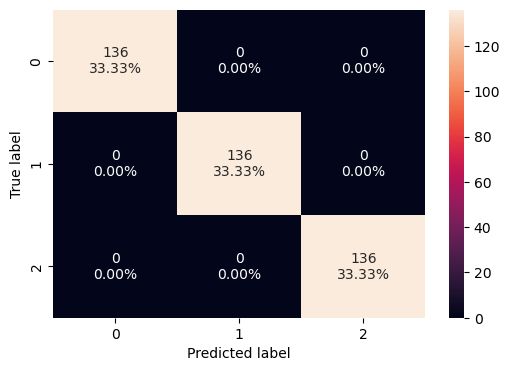

In [250]:
confusion_matrix_sklearn(rf_glove_tuned, X_train_over_glove, y_train_over_glove)

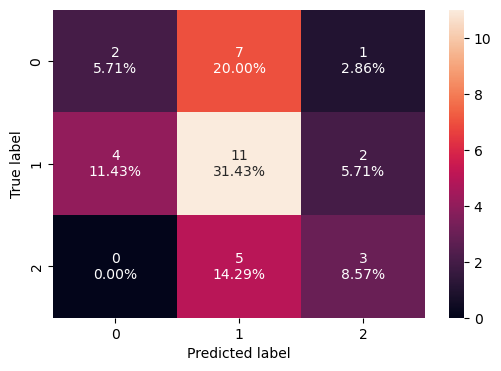

In [251]:
confusion_matrix_sklearn(rf_glove_tuned, X_valid_glove, y_valid_glove)

In [252]:
# Predicting on train data
y_pred_train_glove1 = rf_word2vec_tuned.predict(X_train_over_glove)

In [253]:
# Predicting on validation data
y_pred_valid_glove1 = rf_word2vec_tuned.predict(X_valid_glove)

In [293]:
CL_Glove_Train_Oversample = pd.DataFrame(classification_report(y_train_over_glove, y_pred_train_glove1,digits=2,output_dict=True)).T
print(CL_Glove_Train_Oversample)

              precision    recall  f1-score     support
-1             0.000000  0.000000  0.000000  136.000000
0              0.000000  0.000000  0.000000  136.000000
1              0.333333  1.000000  0.500000  136.000000
accuracy       0.333333  0.333333  0.333333    0.333333
macro avg      0.111111  0.333333  0.166667  408.000000
weighted avg   0.111111  0.333333  0.166667  408.000000


In [294]:
CL_Glove_Valid_Oversample = pd.DataFrame(classification_report(y_valid_glove, y_pred_valid_glove1,digits=2,output_dict=True)).T
print(CL_Glove_Valid_Oversample)

              precision    recall  f1-score    support
-1             0.000000  0.000000  0.000000  10.000000
0              0.000000  0.000000  0.000000  17.000000
1              0.228571  1.000000  0.372093   8.000000
accuracy       0.228571  0.228571  0.228571   0.228571
macro avg      0.076190  0.333333  0.124031  35.000000
weighted avg   0.052245  0.228571  0.085050  35.000000


## Sentiment Analysis - Pre-trained Model

In [256]:
sentiment_hf = pipeline("sentiment-analysis") # this uses the HF default sentiment analysis model

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


In [257]:
trial_data = ["I love this movie", "This movie is not very good at all!",'There is a cat outside.']
sentiment_hf(trial_data)

[{'label': 'POSITIVE', 'score': 0.9998766183853149},
 {'label': 'NEGATIVE', 'score': 0.9998003840446472},
 {'label': 'NEGATIVE', 'score': 0.6246474385261536}]

In [258]:
hf_review_dict = sentiment_hf(stock['Final_cleaned_News'].to_list(),truncation=True)

In [259]:
hf_review_dict

[{'label': 'NEGATIVE', 'score': 0.9985822439193726},
 {'label': 'NEGATIVE', 'score': 0.9959476590156555},
 {'label': 'NEGATIVE', 'score': 0.9963493347167969},
 {'label': 'NEGATIVE', 'score': 0.9958374500274658},
 {'label': 'NEGATIVE', 'score': 0.9953169822692871},
 {'label': 'NEGATIVE', 'score': 0.9928777813911438},
 {'label': 'NEGATIVE', 'score': 0.9959331154823303},
 {'label': 'NEGATIVE', 'score': 0.996798574924469},
 {'label': 'NEGATIVE', 'score': 0.9984049201011658},
 {'label': 'NEGATIVE', 'score': 0.9963841438293457},
 {'label': 'NEGATIVE', 'score': 0.9980081915855408},
 {'label': 'NEGATIVE', 'score': 0.9988628625869751},
 {'label': 'NEGATIVE', 'score': 0.997477114200592},
 {'label': 'NEGATIVE', 'score': 0.9968745708465576},
 {'label': 'NEGATIVE', 'score': 0.9956692457199097},
 {'label': 'NEGATIVE', 'score': 0.9910807013511658},
 {'label': 'NEGATIVE', 'score': 0.9700759053230286},
 {'label': 'NEGATIVE', 'score': 0.9971801042556763},
 {'label': 'NEGATIVE', 'score': 0.99207627773284

In [260]:
hf_review_sent = [0]*len(stock['Final_cleaned_News'])
for News in range(len(stock['Final_cleaned_News'])):
  if hf_review_dict[News]['label']=='POSITIVE':
    hf_review_sent[News] = 1

In [261]:
# creating a function to plot the confusion matrix
def plot_confusion_matrix(actual, predicted):
    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (5, 4))
    label_list = [0, 1]
    sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = label_list, yticklabels = label_list)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

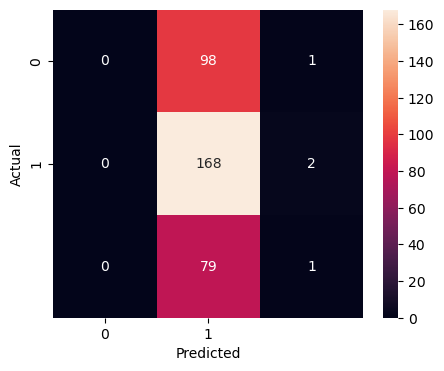

In [262]:
plot_confusion_matrix(y, hf_review_sent)

### Model Comparison & Final Model selection

In [310]:
# Define model names corresponding to each transposed block
model_names1 = [
    'CL_bow_Valid_base',
    'CL_W2V_Valid_base',
    'CL_glo_Valid_base',
    'CL_sent_Valid_base',
    'CL_bow_Valid_cw',
    'CL_w2v_Valid_cw',
    'CL_Glo_Valid_cw',
    'CL_w2v_Valid_cw_2',
    'CL_W2V_Valid_hyp_os',
    'CL_Glo_Valid_hyp',
    'CL_Glove_Valid_Oversample'
]

# Get existing column names
existing_columns = Models_comparision_df_Train.columns

# Create a list to store the new column names
new_column_names = []

for i, model_name in enumerate(model_names1):
    # Assign model_name to the first column of each group
    new_column_names.extend([model_name] + list(existing_columns[i * 6 + 1 : (i + 1) * 6]))

# Assign the new column names to the DataFrame
Models_comparision_df_Train.columns = new_column_names

print("Model Performance summary: - Training Dataset")
Models_comparision_df_Train


Model Performance summary: - Training Dataset


,CL_bow_Valid_base,0,1,accuracy,macro avg,weighted avg,CL_W2V_Valid_base,0,1,accuracy,...,1,accuracy,macro avg,weighted avg,CL_Glove_Valid_Oversample,0,1,accuracy,macro avg,weighted avg
precision,0.250000,0.440000,1.00,0.428571,0.563333,0.513714,0.312500,0.333333,0.285714,0.314286,...,0.0,0.314286,0.172222,0.230952,0.0,0.0,0.228571,0.228571,0.076190,0.052245
recall,0.200000,0.647059,0.25,0.428571,0.365686,0.428571,0.500000,0.235294,0.250000,0.314286,...,0.0,0.314286,0.229412,0.314286,0.0,0.0,1.000000,0.228571,0.333333,0.228571
f1-score,0.222222,0.523810,0.40,0.428571,0.382011,0.409342,0.384615,0.275862,0.266667,0.314286,...,0.0,0.314286,0.195935,0.265505,0.0,0.0,0.372093,0.228571,0.124031,0.085050
support,10.000000,17.000000,8.00,0.428571,35.000000,35.000000,10.000000,17.000000,8.000000,0.314286,...,8.0,0.314286,35.000000,35.000000,10.0,17.0,8.000000,0.228571,35.000000,35.000000


In [313]:
# Model comparison Summary - Training Data set
Models_comparision_df_Train = pd.concat(
    [
        CL_bow_Valid_base.T,
        CL_W2V_Valid_base.T,
        CL_glo_Valid_base.T,
        CL_sent_Valid_base.T,
        CL_bow_Valid_cw.T,
        CL_w2v_Valid_cw.T,
        CL_Glo_Valid_cw.T,
        CL_w2v_Valid_cw.T,
        CL_W2V_Valid_hyp_os.T,
        CL_Glo_Valid_hyp.T,
        CL_Glove_Valid_Oversample.T
    ],
    axis=1,
)

# Get existing column names
existing_columns = Models_comparision_df_Train.columns

# Create a list to store the new column names
new_column_names = []


for i, model_name in enumerate(model_names):
    # Assign model_name to the first column of each group
    new_column_names.extend([model_name] + list(existing_columns[i * 6 + 1 : (i + 1) * 6]))

# Assign the new column names to the DataFrame
Models_comparision_df_Train.columns = new_column_names



print("Model Performance summary: - Training Dataset")
Models_comparision_df_Train

Model Performance summary: - Training Dataset


,CL_bow_Valid_base,0,1,accuracy,macro avg,weighted avg,CL_W2V_Valid_base,0,1,accuracy,...,1,accuracy,macro avg,weighted avg,CL_Glove_Valid_Oversample,0,1,accuracy,macro avg,weighted avg
precision,0.250000,0.440000,1.00,0.428571,0.563333,0.513714,0.312500,0.333333,0.285714,0.314286,...,0.0,0.314286,0.172222,0.230952,0.0,0.0,0.228571,0.228571,0.076190,0.052245
recall,0.200000,0.647059,0.25,0.428571,0.365686,0.428571,0.500000,0.235294,0.250000,0.314286,...,0.0,0.314286,0.229412,0.314286,0.0,0.0,1.000000,0.228571,0.333333,0.228571
f1-score,0.222222,0.523810,0.40,0.428571,0.382011,0.409342,0.384615,0.275862,0.266667,0.314286,...,0.0,0.314286,0.195935,0.265505,0.0,0.0,0.372093,0.228571,0.124031,0.085050
support,10.000000,17.000000,8.00,0.428571,35.000000,35.000000,10.000000,17.000000,8.000000,0.314286,...,8.0,0.314286,35.000000,35.000000,10.0,17.0,8.000000,0.228571,35.000000,35.000000


### Model Testing

We'll check the performance of the tuned RF model with BOW vectors on the test set.

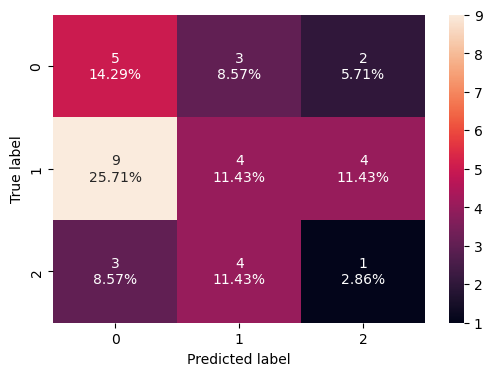

In [315]:
# Now, use this transformed data for prediction:
confusion_matrix_sklearn(rf_word2vec_tuned, X_test_word2vec, y_test_word2vec)

In [316]:
# Predicting on test data
y_pred_test_w2v = rf_word2vec_tuned.predict(X_test_word2vec)

In [317]:
print(classification_report(y_test_word2vec, y_pred_test_w2v))

              precision    recall  f1-score   support

          -1       0.29      0.50      0.37        10
           0       0.36      0.24      0.29        17
           1       0.14      0.12      0.13         8

    accuracy                           0.29        35
   macro avg       0.27      0.29      0.26        35
weighted avg       0.29      0.29      0.28        35



## Model comparison - Observations

Our extensitve analysis of the Stock News Sentiment data in Exploratory Data Analysis (EDA) and model building, has offered us valuable insights into the likelihood of a customer opting for a Stock news Initially, we started our analysis with base modes for different features - BOW, W2V, & Glove. We identified that Neutral value has been good output, however Positive / Negative values hasn't provided good results. This has been due to imbalance data. By leveraging Class Weights on each on different features on BOW, W2V, & Glove, we haven't got desired outputs on Recall value on Positive / Negative / Neutral datas We also explored Hyperparameters on BOW, W2V, & Glove options & expanded to Over sampling options. We have got better results compare to earlier models.

## Model Comparsion - Conclusion

Leveraging Hyperparameter tuning for BOW & W2V model has provided better results compare to other models. Out of these 2 hyperparameter tuning model, Training data set and Valid dataset has provide better results for BOW model, other models has been overfit most of the values.

## **Conclusions and Recommendations**

We analyzed the distribution of sentiments of the Stock News.

We have build ML model (Random Forest) with combination of Bang of Words, Word2Vec & Glove

Then We built an ML model (Random Forest) with the Sentence transformer and pre-trained models (using pipeline and LLM prompt).

The Random Forest with hyperparameters model is the best model and was able to achieve a recall higher score on the train and test dataset respectively compare to other models with the given dataset.

By pinpointing areas of improvement or concerns raised by customers based on the predictions of the model, the organization can take swift and targeted actions to address issues, minimizing the risk of revenue loss and bolstering customer satisfaction.

Finally, in addition to all the above, we have evaluated with existing Hugging face model

One can manually label the data (overall sentiment and sentiments of different aspects) and then compare the model's output with the same to get a quantitative measure of the models performance.

To try and improve the model performance, we can try the following:

Update the prompt

Update the model parameters (temparature, top_p, ...)-

